# Introduction

In this colab, the number of collisions by the weather on a particular day in New York will be analysed to see if there really is a correlation between the number of collisions and the weather.

The dataset includes 2012 up to the present day (minus a few days/month) and will be analysed with a focus to recent years.

This colab will then remove anomalies and analyse to see if anything changes, before preparing the data for use in regression and deep neural network models by selecting the top 3 correlating weather data that differs in units.

# Methodology

The main methodology that will be used here is regression analysis. This is because in the dataset, different weather variables such as temperature, visibility, wind speed, fog, etc, will be compared against on main variable - number of collisions - to see if there is a correlation between the weather and the number of collisions.

# Prior Similar Work

Jennifer Davies (Davies, 2015) and Toby Staines (Staines, 2018) have also done similar work on analysing and discussing the relationship between the weather and the number of car crashes.

Staines concluded that there was no major correlation between the number of collisions and the weather bar a few examples, whilst Davies concluded that rain and temperature had some contribution to the number of collisions.

Apart from their differing conclusions, they both seem to agree that the number of collisions rose when the conditions were safer, saying that drivers tended to be more careful/choosing not to drive when the conditions were more dangerous.

# Get Dataset

In [4]:
# collisions data ordered by date (starting from 2012 to present)
collisions <- read.csv("https://raw.githubusercontent.com/Finn-Anderson/BscHons-Data-Analytics/main/collated_collisions_data.csv", stringsAsFactors = TRUE)[order(collisions$collision_date),]

# Data Explanation

In [ ]:
head(collisions)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
296  7   2012 7  1  2012-07-01     83.6 63.0 1008.9  9.7  4.1   9.9   18.1 93.0
1654 1   2012 7  2  2012-07-02     80.3 54.1 1011.6 10.0  3.8  15.0  999.9 88.0
741  2   2012 7  3  2012-07-03     79.8 56.7 1012.8 10.0  2.9  12.0  999.9 88.0
574  3   2012 7  4  2012-07-04     81.8 65.6 1009.1  9.2  3.6  11.1  999.9 91.0
1860 4   2012 7  5  2012-07-05     86.7 64.3 1007.4  9.4  3.8  15.0  999.9 93.9
335  5   2012 7  6  2012-07-06     81.9 62.3 1011.7 10.0  3.1   9.9  999.9 91.0
     min  prcp  sndp  fog NUM_COLLISIONS
296  66.0  0.00 999.9 0   538           
1654 66.9  0.00 999.9 0   564           
741  63.0  0.00 999.9 0   664           
574  68.0  0.06 999.9 0   432           
1860 70.0 99.99 999.9 0   591           
335  66.9  0.00 999.9 0   638

In [ ]:
summary(collisions)

      day         year            mo               da           collision_date
 Min.   :1   Min.   :2012   Min.   : 1.000   Min.   : 1.00   2014-02-28:   2  
 1st Qu.:2   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.00   2014-03-01:   2  
 Median :4   Median :2018   Median : 7.000   Median :16.00   2014-03-02:   2  
 Mean   :4   Mean   :2018   Mean   : 6.545   Mean   :15.67   2014-03-03:   2  
 3rd Qu.:6   3rd Qu.:2021   3rd Qu.:10.000   3rd Qu.:23.00   2014-03-04:   2  
 Max.   :7   Max.   :2024   Max.   :12.000   Max.   :31.00   2014-03-05:   2  
                                                             (Other)   :4311  
      temp            dewp               slp            visib       
 Min.   : 5.80   Min.   :  -10.40   Min.   :  989   Min.   : 0.200  
 1st Qu.:41.30   1st Qu.:   32.70   1st Qu.: 1012   1st Qu.: 7.300  
 Median :52.30   Median :   45.50   Median : 1017   Median : 9.500  
 Mean   :52.37   Mean   :   47.16   Mean   : 1145   Mean   : 8.369  
 3rd Qu.:64.80   3rd Qu

Above represents the data in the dataset, showing the data at the head (start) of the dataset along with the statistics. Below describes the meaning of each heading:

day - day in the week.

mo - month in calendar year.

da - day in calendar month.

temp - Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9.

dewp - Mean dew point for the day in degrees Fahrenheit to tenths. Missing = 9999.9.

slp - Mean sea level pressure for the day in millibars to tenths. Missing = 9999.9.

visib - Mean visibility for the day in miles to tenths. Missing = 999.9.

wdsp - Mean wind speed for the day in knots to tenths. Missing = 999.9.

mxpsd - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9.

gust - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9.

max - Maximum temperature reported during the day in Fahrenheit to tenths. Time of max temp report varies by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9.

min - Minimum temperature reported during the day in Fahrenheit to tenths. Time of min temp report varies by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9.

prcp - Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths; will usually not end with the midnight observation, i.e., may include latter part of previous day. .00 indicates no measurable precipitation (includes a trace). Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation. Therefore, '99.99' will often appear on these days. Also, for example, a station may only report a 6-hour amount for the period during which rain fell. See Flag field for source of data.

sndp - Snow depth in inches to tenths. Logs the last report for the day if reported more than once. Missing = 999.9 Note: Most stations do not report '0' on days with no snow on the ground. Therefore, '999.9' will often appear on these days.

fog - Indicators (1 = yes, 0 = no/not reported) for the occurrence during the day.

# Number of collisions by the days of the week, month and year

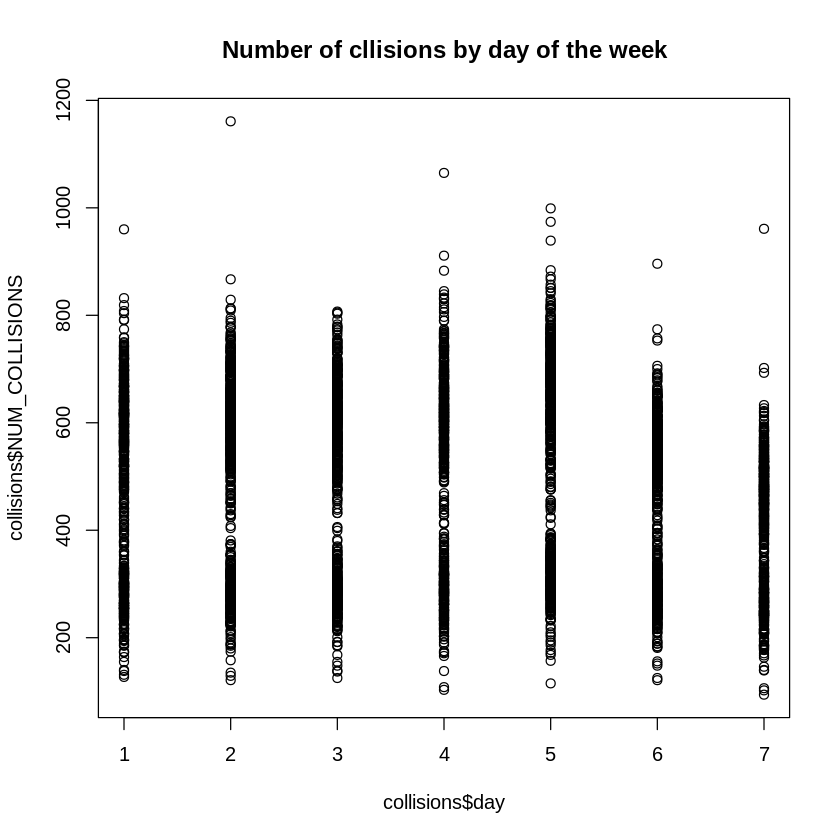

In [ ]:
plot(collisions$day, collisions$NUM_COLLISIONS, main="Number of collisions by day of the week")

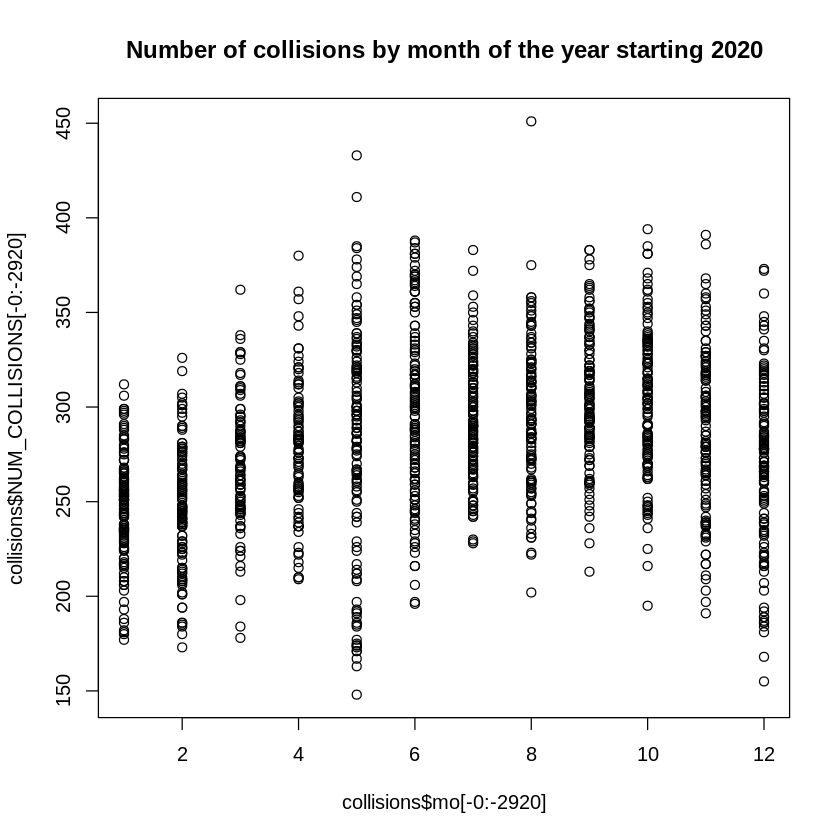

In [ ]:
plot(collisions$mo[-0:-2920], collisions$NUM_COLLISIONS[-0:-2920], main="Number of collisions by month of the year since mid-2020")

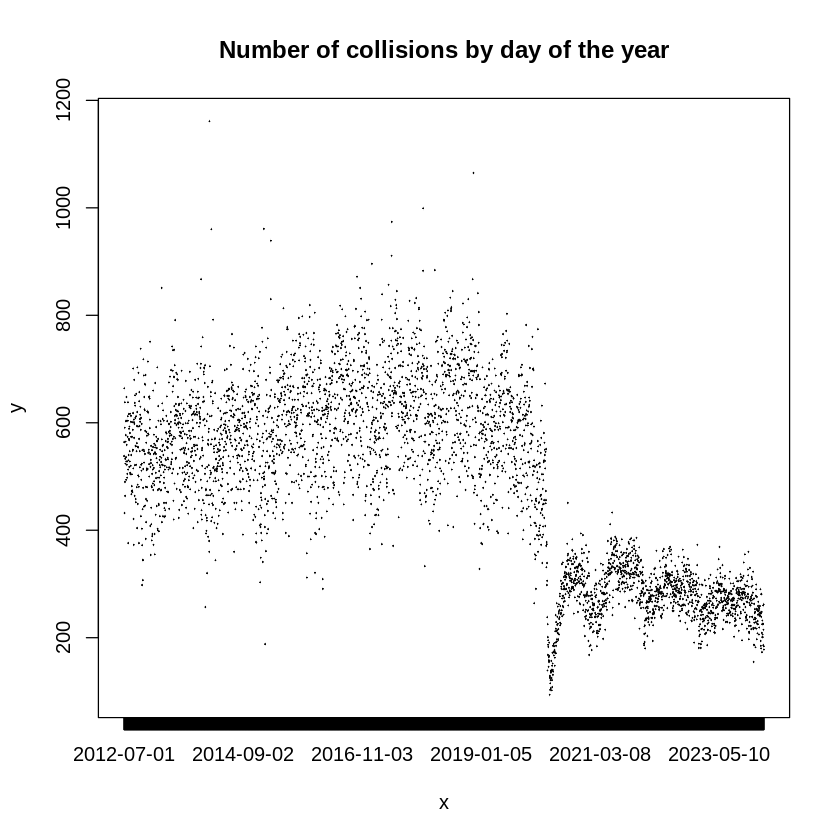

In [ ]:
plot(collisions$collision_date, collisions$NUM_COLLISIONS, main="Number of collisions by day of the year")

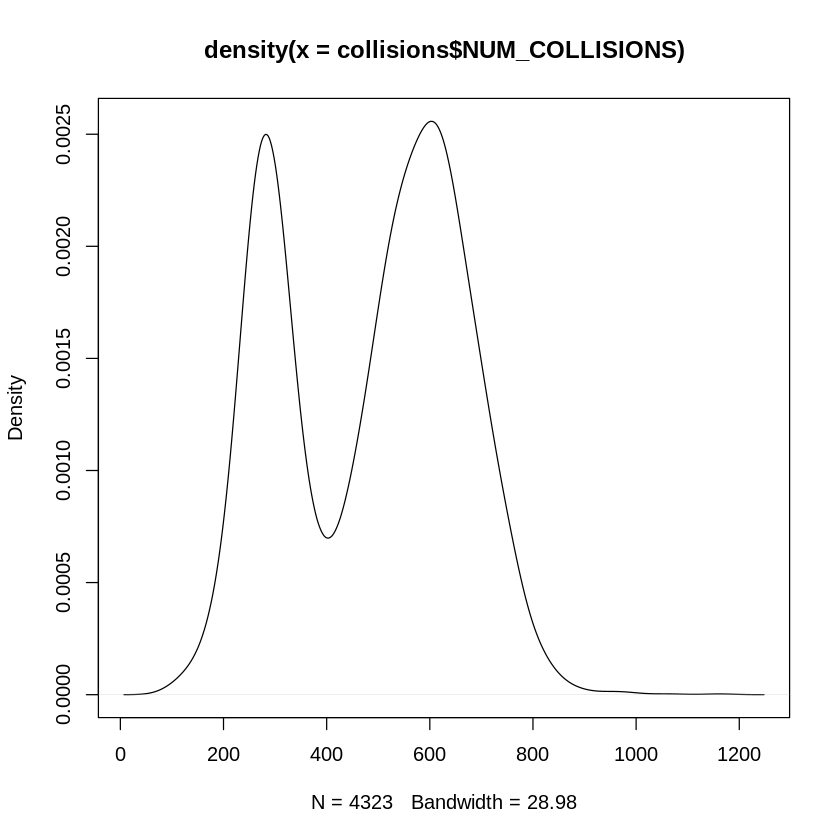

In [ ]:
plot(density(collisions$NUM_COLLISIONS))

After plotting the collision data, it is clearly showing a trend of less collisions on the weekends (6-7) and less in recent years.

A significant drop occurred in 2020 and although this is likely due to Covid-19 and the subsequent lockdown(s) that followed, it is interesting to note that the number of collisions never rose back to pre-covid levels. In-fact, it looks like the number of collisions are decreasing year-by-year.

The plot density diagram also shows the peaks in the number of collisions at 600 and 300. Referring to the number of collisions by day of the year graph, it is safe to assume that the norm used to be around 600 but since 2020 that has fallen to 300. This is important to note as it would mean that years prior to 2020 would have more sway on the results due to having a larger sample size than recent years.

The month by year graph also shows that January experiences the least number of collisions every year since mid-2020 when lockdown(s) occurred.

# Common Perceived Suspects

In [ ]:
library(lattice)

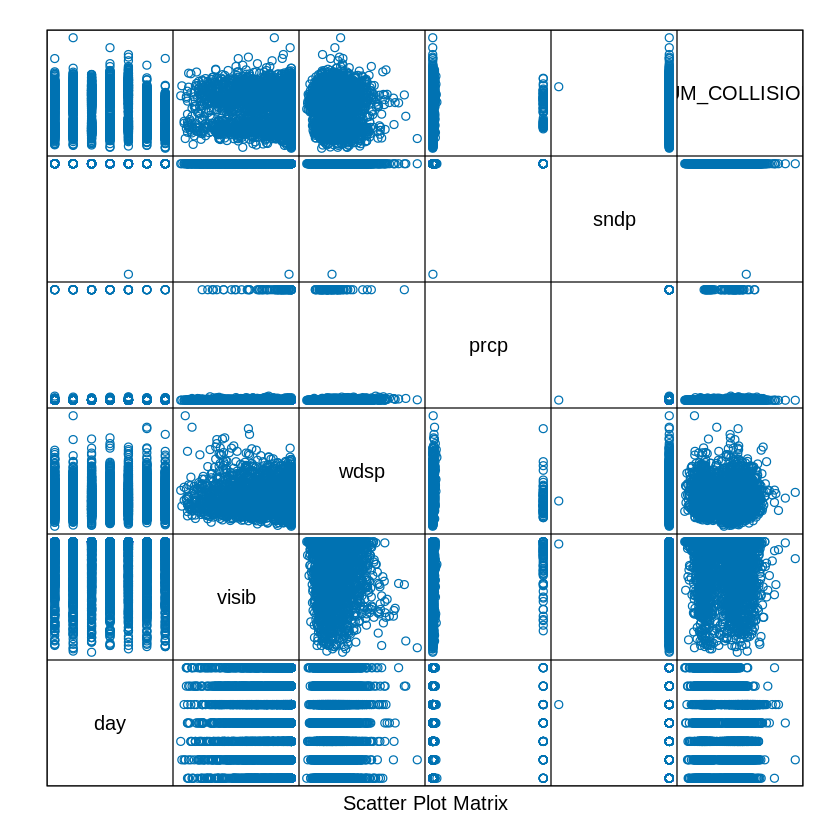

In [ ]:
splom(~ collisions[,c(1, 9, 10, 15, 16, 18)], groups=NULL, data=collisions, axis.line.tck=0, axis.text.alpha=0)

Above are the usual suspects for collisions compiled in a scatter plot matrix. This scatter plot does not show much in terms of the effects weather has on the number of collisions, but it does have an outlier.

Visibility and wind speed don't seem to influence the number of collisions, as the seem consistent no matter the value.

Looking at the snow dropped in inches, there is only one dot on the graph that shows snow being recorded (the dot on the left hand-side). This dot shows that snow has a huge reason for why collisions occur, as shown being quite high up in the number of collisions despite only being a singular dot. However, because of the low-sample size, the singular dot could be skewing the results. So, it is important to take this with a grain of salt.

Precipitation in inches is also hard to compare due to the amount of 'missing' data having a large number and thus occluding the actual data. This will be solved by omitting the 'missing' data.

# Omitting the Missing Data

To omit the missing data, the data values for missing will be set to NA. This should mean that graphs and correlations represent the true number of collisions for the weather recorded on that day.

A r function called filter() could be used but that would need to have been done every time a correlation is made and so would be inefficient.

It is important to do this separate as it would be bad to lose valid data where one field is missing data. So, for example, data should not be omitted just because on field in the row contains invalid/missing data.

In [81]:
colfiltered <- collisions

In [21]:
library(dplyr)

In [83]:
colfiltered <- colfiltered %>% mutate(dewp = replace(dewp, dewp == 9999.9, NA))

In [84]:
colfiltered <- colfiltered %>% mutate(slp = replace(slp, slp == 9999.9, NA))

In [85]:
colfiltered <- colfiltered %>% mutate(mxpsd = replace(mxpsd, mxpsd == 999.9, NA))

In [86]:
colfiltered <- colfiltered %>% mutate(gust = replace(gust, gust == 999.9, NA))

In [88]:
colfiltered <- colfiltered %>% mutate(prcp = replace(prcp, prcp == 99.99, NA))

In [90]:
colfiltered <- colfiltered %>% mutate(sndp = replace(sndp, sndp == 999.9, NA))

In [91]:
head(colfiltered)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
296  7   2012 7  1  2012-07-01     83.6 63.0 1008.9  9.7  4.1   9.9  18.1 93.0
1654 1   2012 7  2  2012-07-02     80.3 54.1 1011.6 10.0  3.8  15.0    NA 88.0
741  2   2012 7  3  2012-07-03     79.8 56.7 1012.8 10.0  2.9  12.0    NA 88.0
574  3   2012 7  4  2012-07-04     81.8 65.6 1009.1  9.2  3.6  11.1    NA 91.0
1860 4   2012 7  5  2012-07-05     86.7 64.3 1007.4  9.4  3.8  15.0    NA 93.9
335  5   2012 7  6  2012-07-06     81.9 62.3 1011.7 10.0  3.1   9.9    NA 91.0
     min  prcp sndp fog NUM_COLLISIONS
296  66.0 0.00 NA   0   538           
1654 66.9 0.00 NA   0   564           
741  63.0 0.00 NA   0   664           
574  68.0 0.06 NA   0   432           
1860 70.0   NA NA   0   591           
335  66.9 0.00 NA   0   638

As shown in the above head for colfiltered, the data that used to be missing data is now represented as NA. This means colfilterd is now setup for data analysis.

Here is an example of checking the data for correlations before filtering and after filtering with plots showing the regression line:

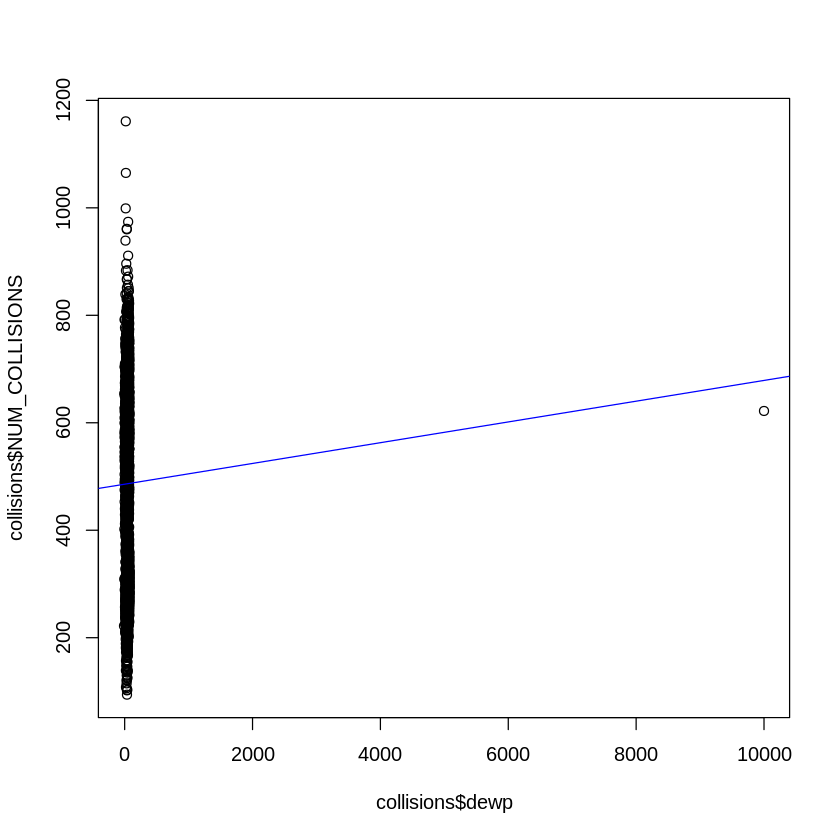

In [92]:
plot(collisions$NUM_COLLISIONS ~ collisions$dewp)
abline(lm(collisions$NUM_COLLISIONS ~ collisions$dewp), col="blue")

In [93]:
cor(collisions$dewp, collisions$NUM_COLLISIONS)

[1] 0.01712421

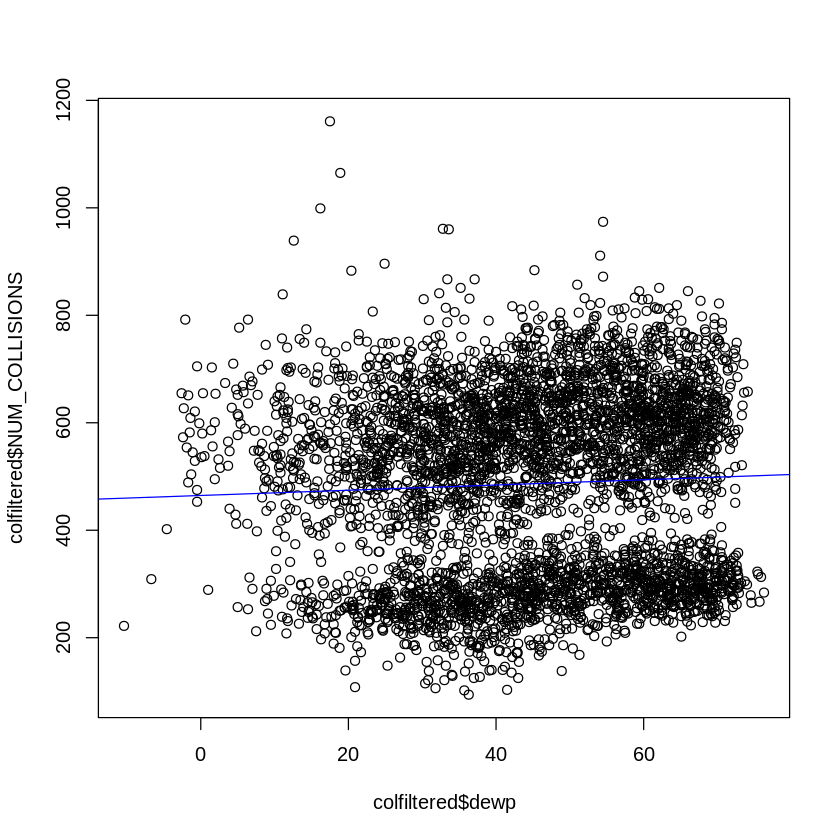

In [94]:
plot(colfiltered$NUM_COLLISIONS ~ colfiltered$dewp)
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$dewp), col="blue")

In [97]:
cor(colfiltered$dewp, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.04745549

You can see the correlation has risen by about 3x since filtering. Not all correlations will rise - in fact there is a possibility that correlations may decrease. However, this is still clear evidence that the unfiltered missing data has a big impact on the correlations and so must be filtered out to produce a correct result.

Some data will not need to be filtered as they have not logged missing data, such as temperature and fog. For those the original dataset can be used without the need of filtering. This will be apparent in the graphs as they will not have a result that drastically different from the rest of the plotted points.

The ending of cor has use="complete.obs", which is essential for ignoring the NA parts of the field. Without it, the result would be <NA>. This will be used for every correlation from now on, even if the field does not contain NA values. This is illustrated below:

In [98]:
cor(colfiltered$dewp, colfiltered$NUM_COLLISIONS)

[1] NA

# Correlations

Now that the missing data has been omitted, the dataset can finally be checked to see if the recorded data has any correlation to the number of collisions.

Dewp will not be used in this as it was already done as an example above.

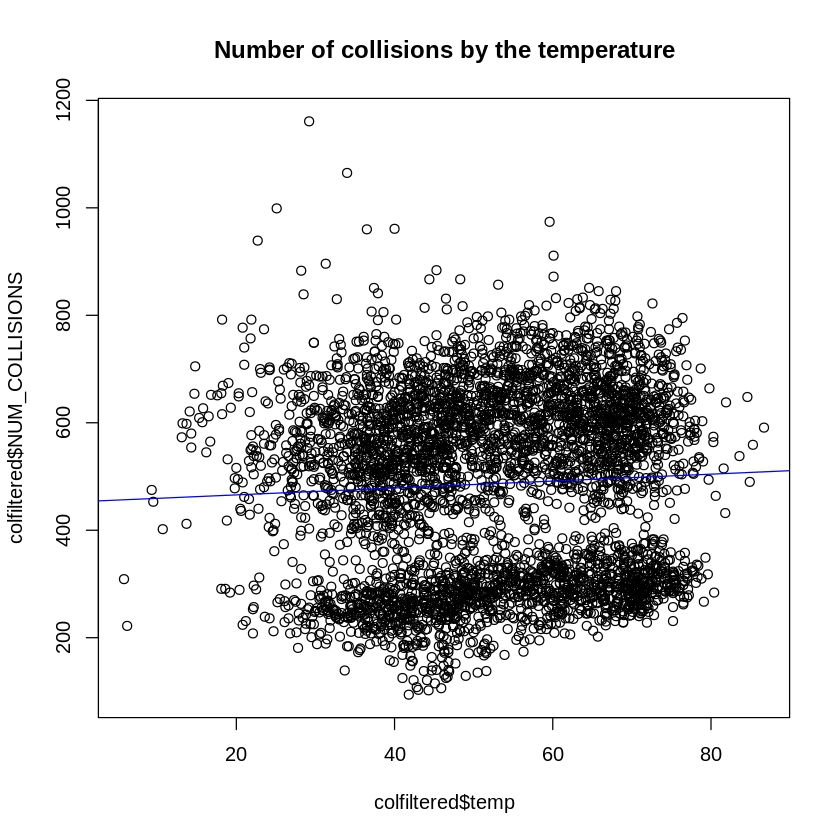

In [99]:
plot(colfiltered$temp, colfiltered$NUM_COLLISIONS, main="Number of collisions by the temperature")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$temp), col="blue")

In [100]:
cor(colfiltered$temp, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.05316626

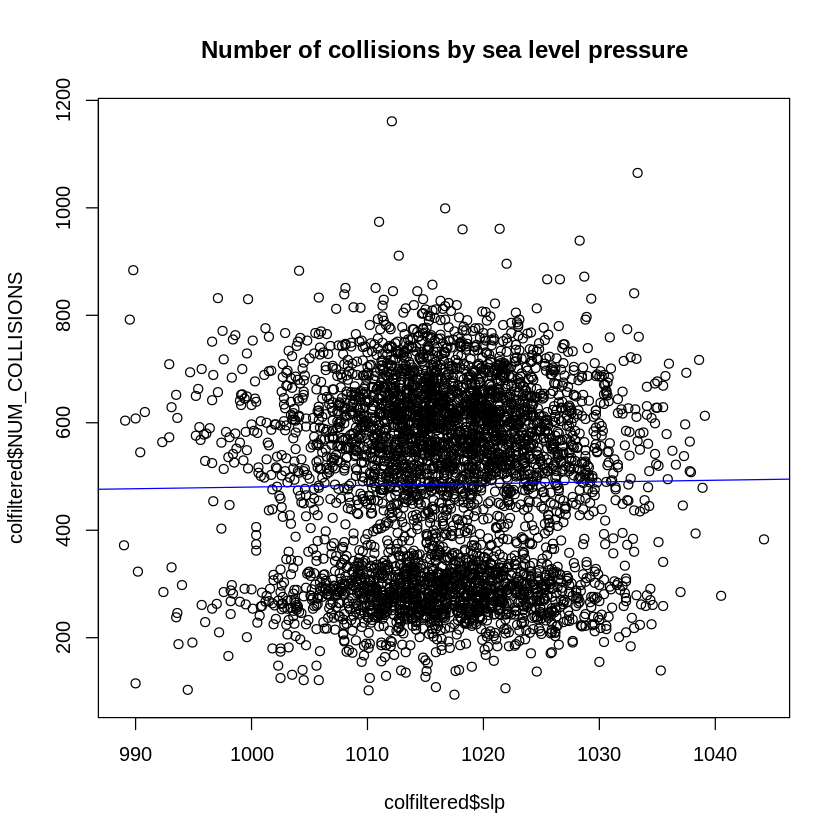

In [101]:
plot(colfiltered$slp, colfiltered$NUM_COLLISIONS, main="Number of collisions by sea level pressure")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$slp), col="blue")

In [102]:
cor(colfiltered$slp, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.01395409

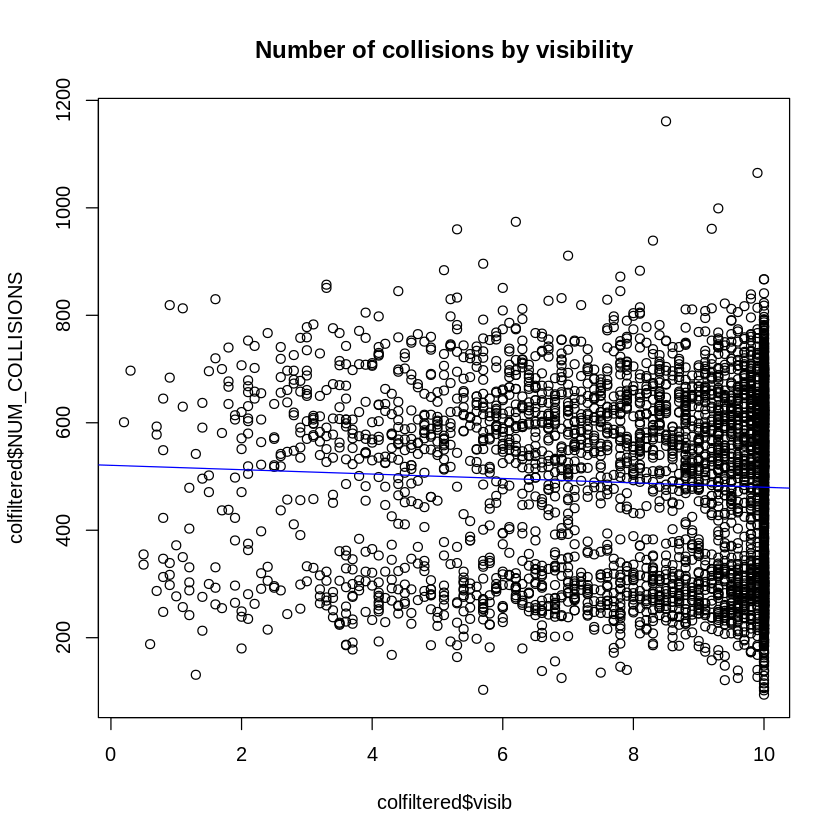

In [103]:
plot(colfiltered$visib, colfiltered$NUM_COLLISIONS, main="Number of collisions by visibility")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$visib), col="blue")

In [104]:
cor(colfiltered$visib, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] -0.05159259

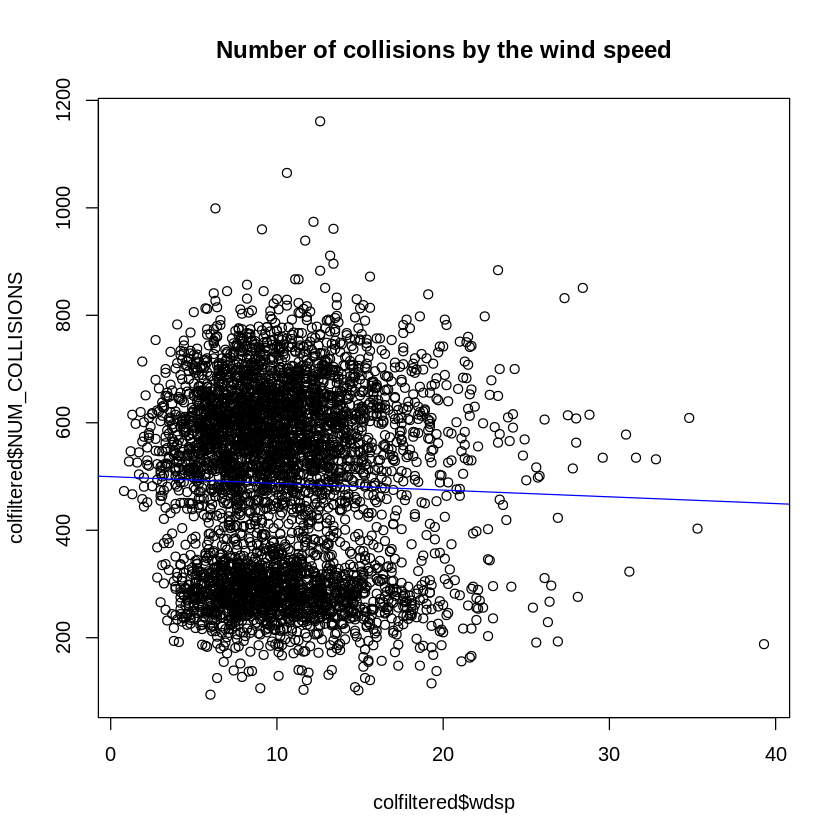

In [105]:
plot(colfiltered$wdsp, colfiltered$NUM_COLLISIONS, main="Number of collisions by the wind speed")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$wdsp), col="blue")

In [ ]:
cor(colfiltered$wdsp, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] -0.03159009

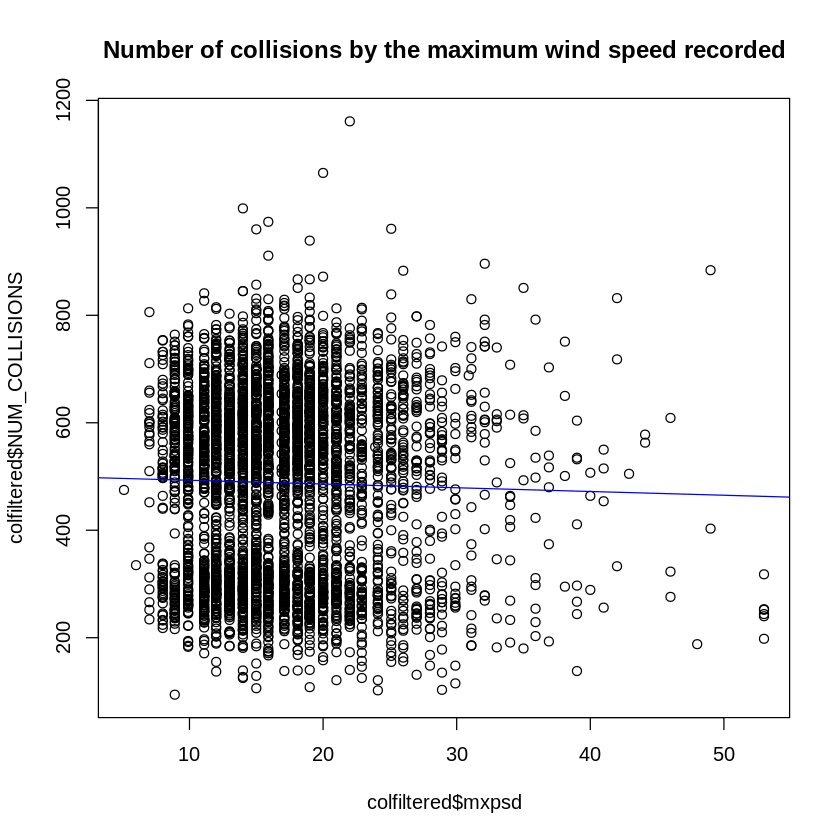

In [106]:
plot(colfiltered$mxpsd, colfiltered$NUM_COLLISIONS, main="Number of collisions by the maximum wind speed recorded")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$mxpsd), col="blue")

In [107]:
cor(colfiltered$mxpsd, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] -0.02440051

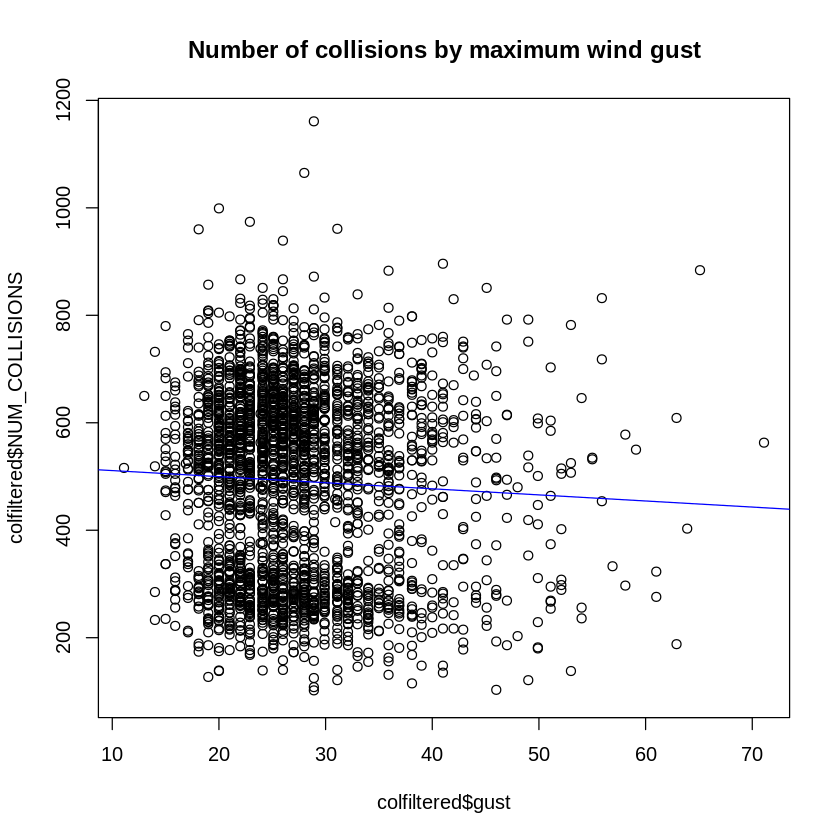

In [108]:
plot(colfiltered$gust, colfiltered$NUM_COLLISIONS, main="Number of collisions by maximum wind gust")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$gust), col="blue")

In [109]:
cor(colfiltered$gust, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] -0.04919478

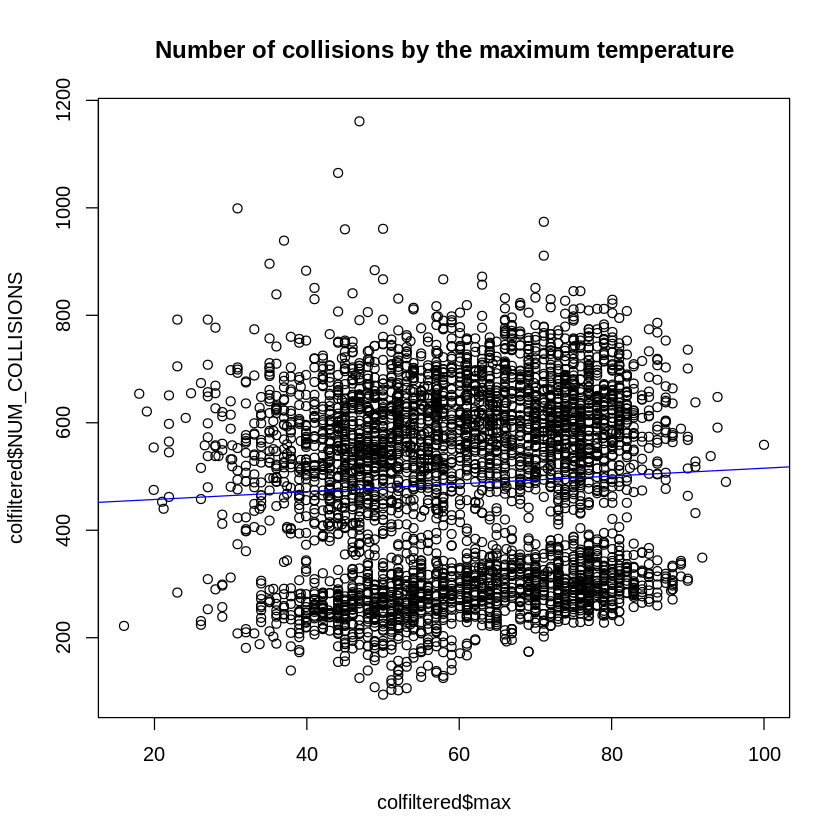

In [110]:
plot(colfiltered$max, colfiltered$NUM_COLLISIONS, main="Number of collisions by the maximum temperature")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$max), col="blue")

In [111]:
cor(colfiltered$max, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.06078731

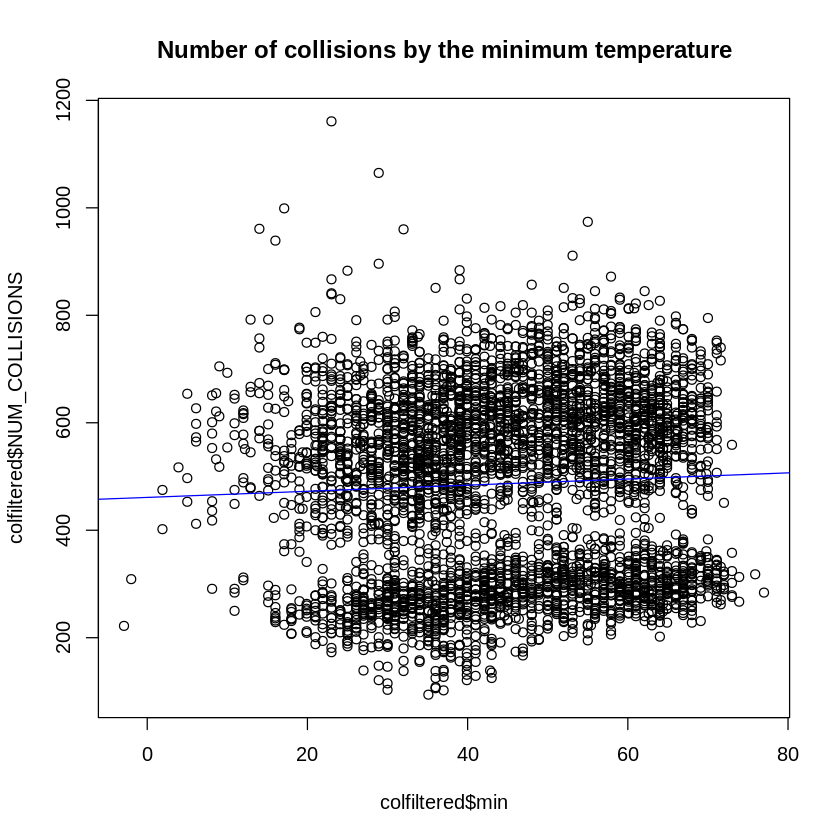

In [112]:
plot(colfiltered$min, colfiltered$NUM_COLLISIONS, main="Number of collisions by the minimum temperature")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$min), col="blue")

In [113]:
cor(colfiltered$min, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.04888501

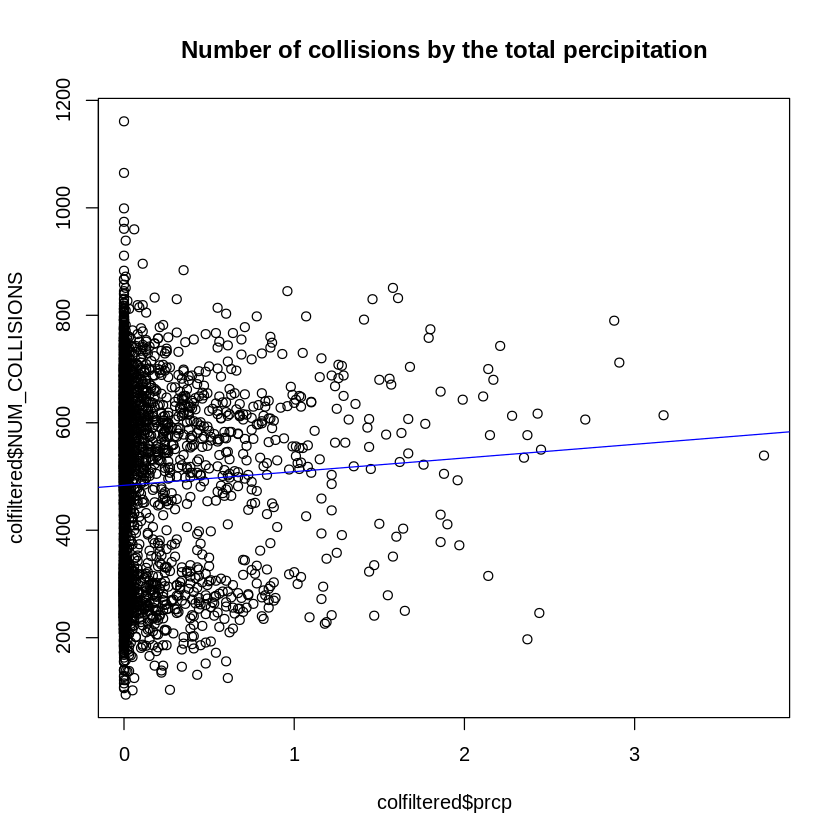

In [114]:
plot(colfiltered$prcp, colfiltered$NUM_COLLISIONS, main="Number of collisions by the total percipitation")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$prcp), col="blue")

In [115]:
cor(colfiltered$prcp, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.04417258

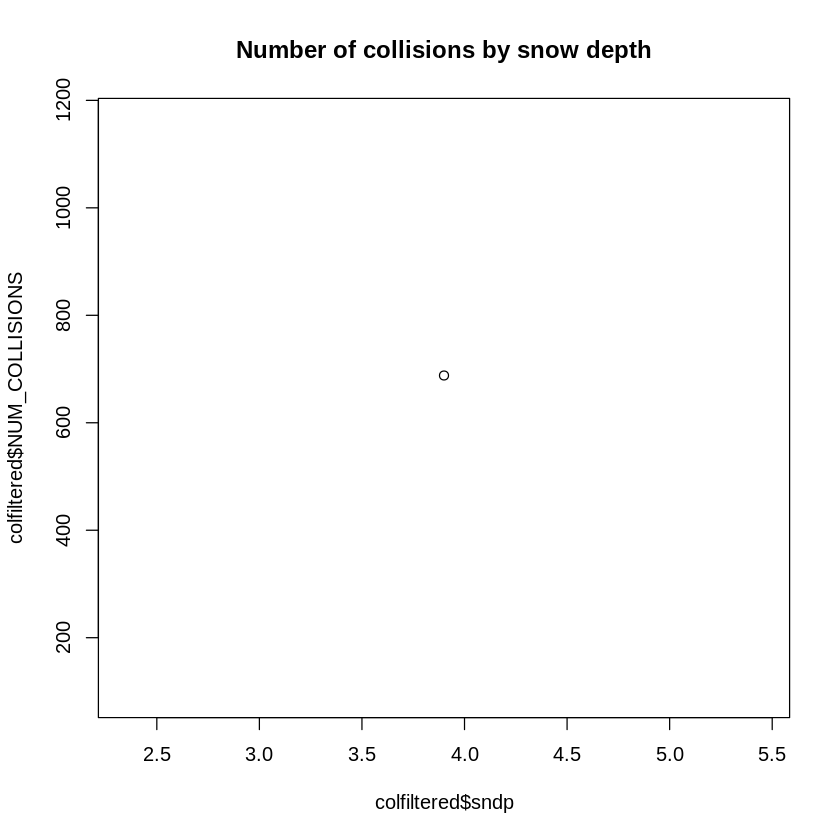

In [116]:
plot(colfiltered$sndp, colfiltered$NUM_COLLISIONS, main="Number of collisions by snow depth")

In [117]:
cor(colfiltered$sndp, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] NA

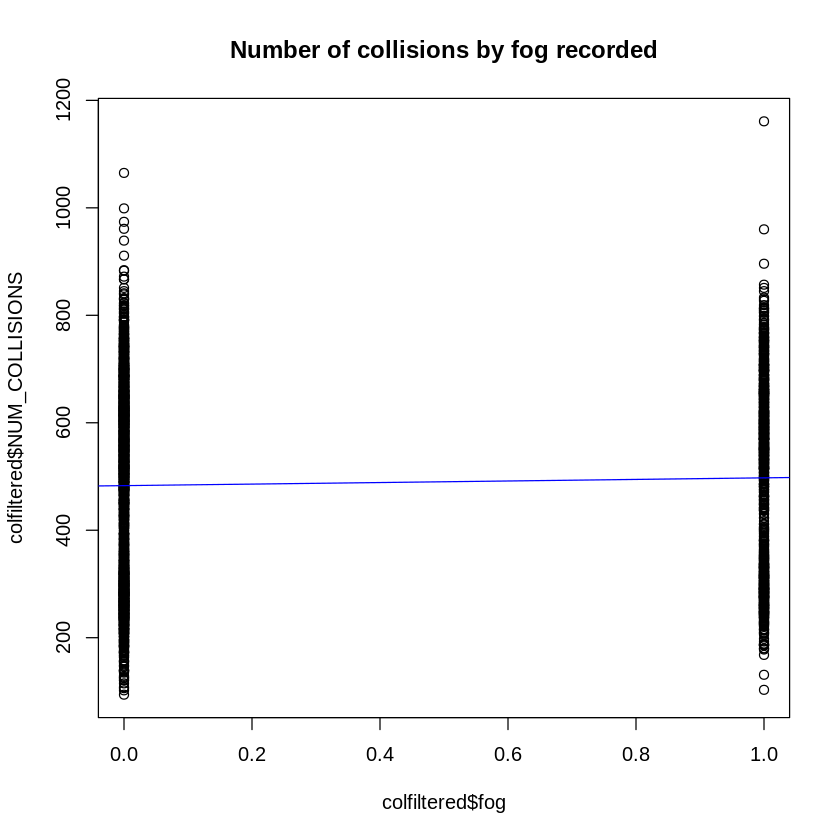

In [118]:
plot(colfiltered$fog, colfiltered$NUM_COLLISIONS, main="Number of collisions by fog recorded")
abline(lm(colfiltered$NUM_COLLISIONS ~ colfiltered$fog), col="blue")

In [119]:
cor(colfiltered$fog, colfiltered$NUM_COLLISIONS, use="complete.obs")

[1] 0.03655138

Using the above data and correlations, it shows there is barely any correlation between the weather and the number of collisions across the years.

Those influenced by wind speed along with the visibility field seem to have a negative correlation with the number of collisions, indicating that the number of collisions reduces as those values increase.

However, those influenced by temperature along with precipitation and fog have a positive correlation which means as those rise, so does the number of collisions.

Finally, snow depth has a NA correlation due to the low sample size of 1 sample.

# Analysing the Data 2020 - Current

With the number of collisions by day of the year graph, it showed a drop in the number of collisions in 2020 and stayed lower in the years to the current date. The results of those years could be different from the results in the years prior to 2020. So, those years will be split up and then viewed on their own and together to see if the results differ.

Correlations will also be checked to see if there are any drastic changes both between the years, and from the original correlations. The data will need to be filtered like how it was done for the whole dataset, except this time for each year.

Due to the data being analysed in late March/early May, the current year, which is 2024, will not be analysed. If the year was almost over, then there may have been a case to look at the current data present for 2024.

The data will be based on the colfiltered dataset so that the data does not need to be refiltered when checking and comparing correlations/graphs.

In [120]:
colsplitcheck <- colfiltered

In [121]:
colsc19 <- colsplitcheck[which(colsplitcheck$year == 2019), ]

dayofyear <- 1*seq_len(nrow(colsc19))
dayindex <- 1*seq_len(nrow(colsc19))
colsc19a <- cbind(dayindex, dayofyear, colsc19)

In [122]:
colsc20 <- colsplitcheck[which(colsplitcheck$year == 2020), ]

dayofyear <- 1*seq_len(nrow(colsc20))
dayindex <- 1*seq_len(nrow(colsc20)) + 365
colsc20a <- cbind(dayindex, dayofyear, colsc20)

In [123]:
colsc21 <- colsplitcheck[which(colsplitcheck$year == 2021), ]

dayofyear <- 1*seq_len(nrow(colsc21))
dayindex <- 1*seq_len(nrow(colsc21)) + 730
colsc21a <- cbind(dayindex, dayofyear, colsc21)

In [124]:
colsc22 <- colsplitcheck[which(colsplitcheck$year == 2022), ]

dayofyear <- 1*seq_len(nrow(colsc22))
dayindex <- 1*seq_len(nrow(colsc22)) + 1095
colsc22a <- cbind(dayindex, dayofyear, colsc22)

In [125]:
colsc23 <- colsplitcheck[which(colsplitcheck$year == 2023), ]

dayofyear <- 1*seq_len(nrow(colsc23))
dayindex <- 1*seq_len(nrow(colsc23)) + 1460
colsc23a <- cbind(dayindex, dayofyear, colsc23)

In [156]:
library(ggplot2)

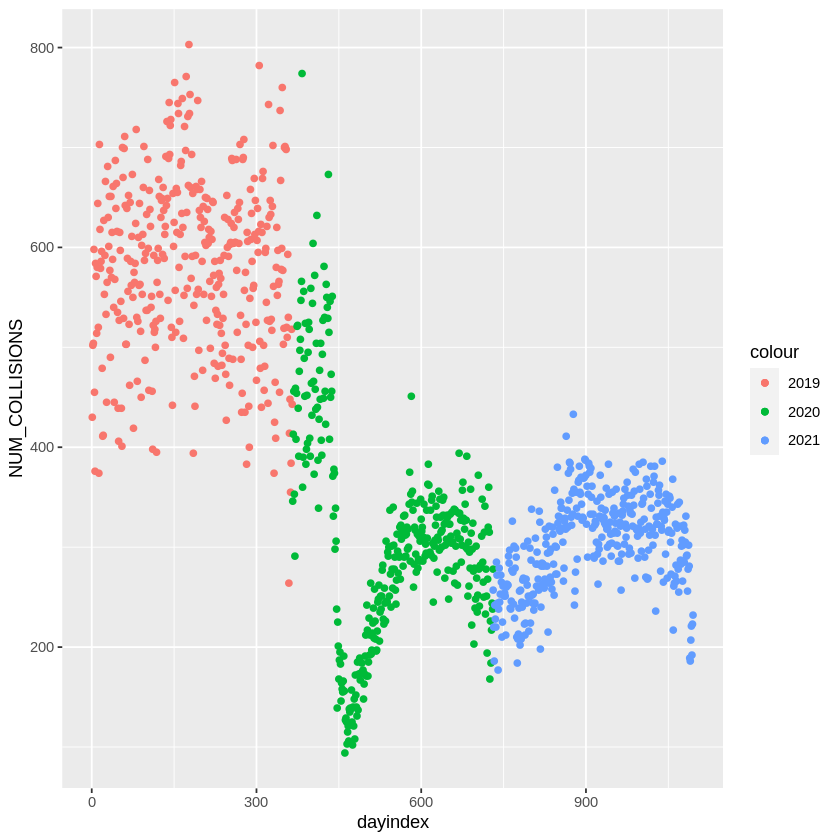

In [ ]:
ggplot() +
  geom_point(data=colsc19a, aes(dayindex, NUM_COLLISIONS, color="2019")) +
  geom_point(data=colsc20a, aes(dayindex, NUM_COLLISIONS, color="2020")) +
  geom_point(data=colsc21a, aes(dayindex, NUM_COLLISIONS, color="2021"))

The graph above shows a clearer view of the drop off on the number of collisions in early-to-mid 2020.

Now, each field from the datasets will be checked for their correlations. Only temperature will be plotted along with a regression line as an illustration of how the data changes each year.

In the plot checking the dip in 2020, only 2019, 2020 and 2021 was used. For checking the correlations, 2022 and 2023 will also be checked. However, as a reminder from before, 2024 will not be checked as the current year is not over.

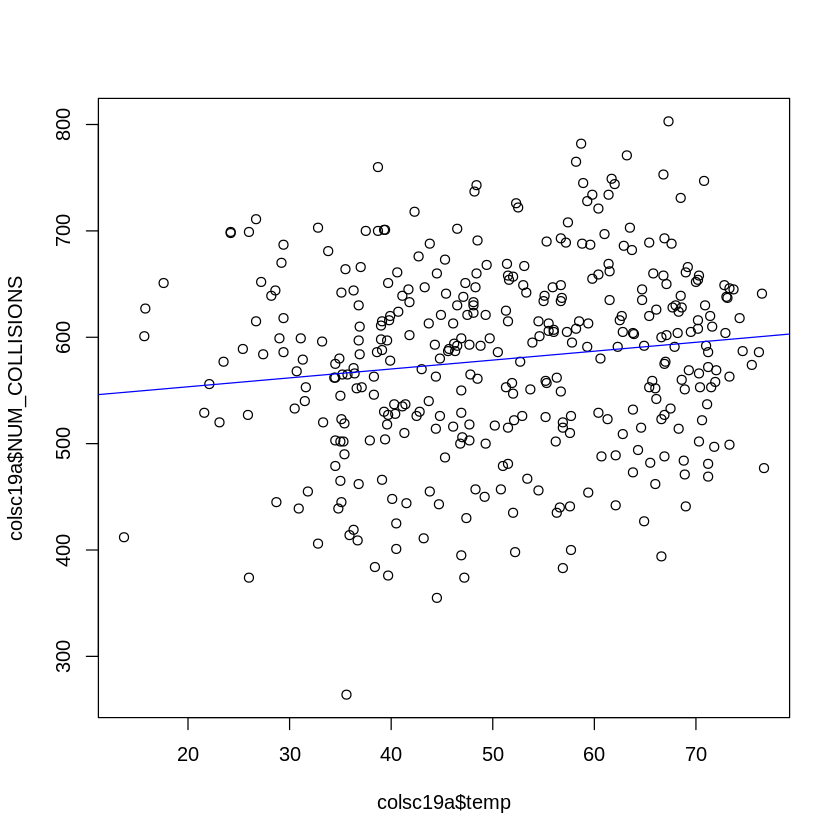

In [126]:
plot(colsc19a$NUM_COLLISIONS ~ colsc19a$temp)
abline(lm(colsc19a$NUM_COLLISIONS ~ colsc19a$temp), col="blue")

In [129]:
cor(colsc19a$temp, colsc19a$NUM_COLLISIONS, use="complete.obs")

[1] 0.1329058

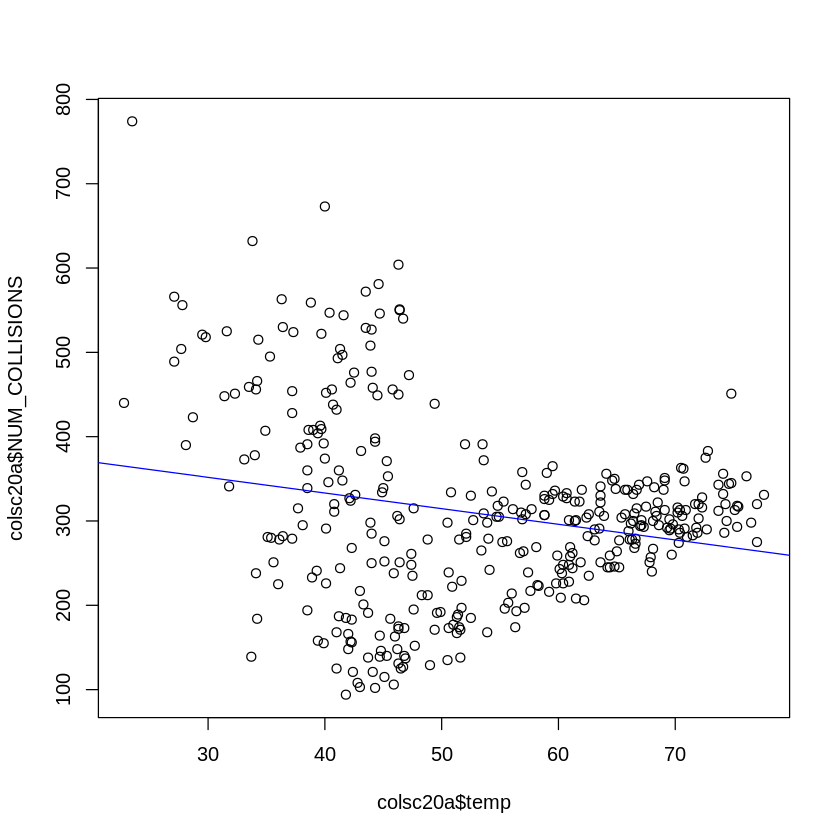

In [128]:
plot(colsc20a$NUM_COLLISIONS ~ colsc20a$temp)
abline(lm(colsc20a$NUM_COLLISIONS ~ colsc20a$temp), col="blue")

In [130]:
cor(colsc20a$temp, colsc20a$NUM_COLLISIONS, use="complete.obs")

[1] -0.2169225

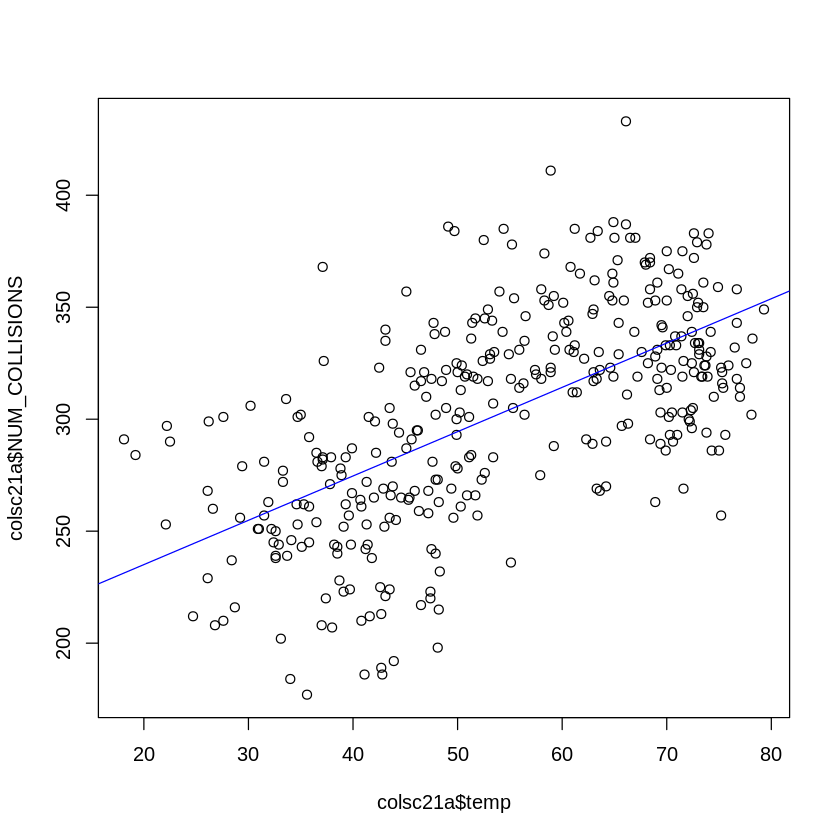

In [131]:
plot(colsc21a$NUM_COLLISIONS ~ colsc21a$temp)
abline(lm(colsc21a$NUM_COLLISIONS ~ colsc21a$temp), col="blue")

In [132]:
cor(colsc21a$temp, colsc21a$NUM_COLLISIONS, use="complete.obs")

[1] 0.6183139

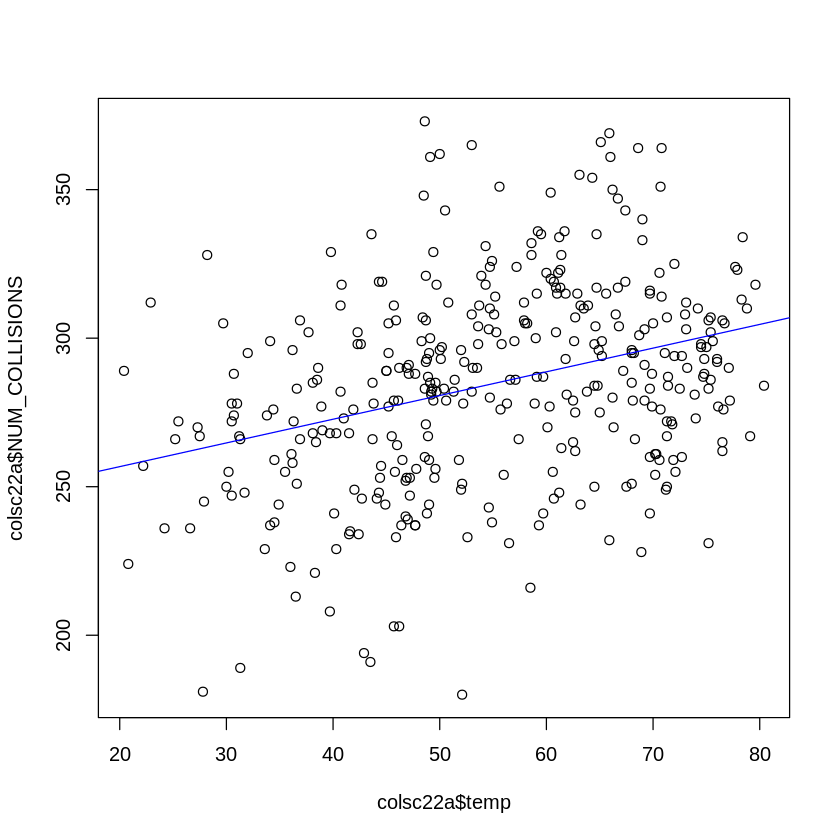

In [133]:
plot(colsc22a$NUM_COLLISIONS ~ colsc22a$temp)
abline(lm(colsc22a$NUM_COLLISIONS ~ colsc22a$temp), col="blue")

In [134]:
cor(colsc22a$temp, colsc22a$NUM_COLLISIONS, use="complete.obs")

[1] 0.3284157

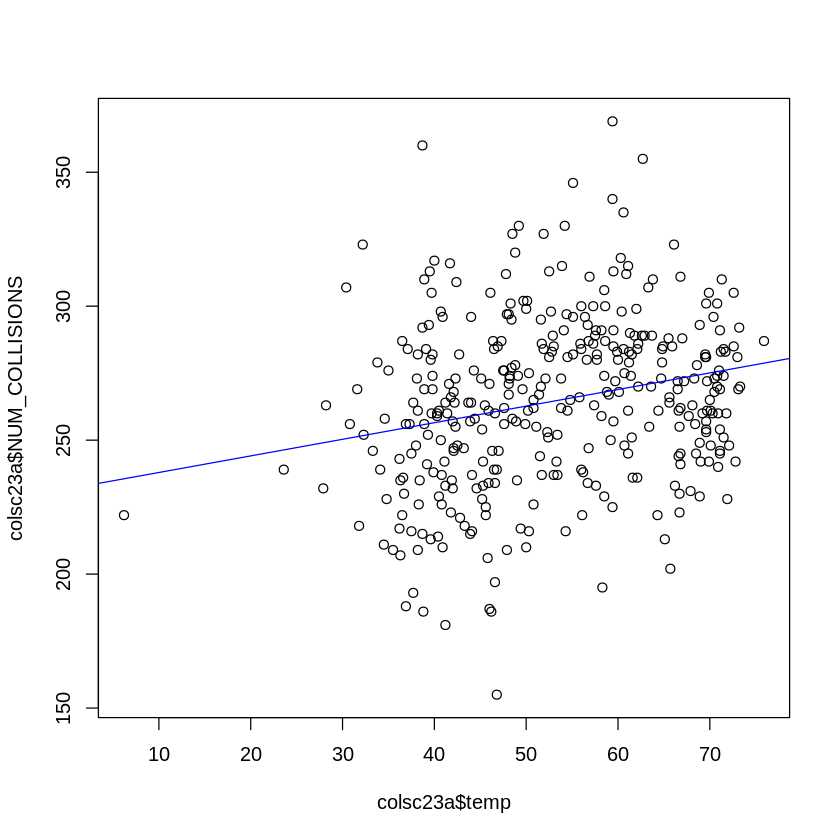

In [136]:
plot(colsc23a$NUM_COLLISIONS ~ colsc23a$temp)
abline(lm(colsc23a$NUM_COLLISIONS ~ colsc23a$temp), col="blue")

In [135]:
cor(colsc23a$temp, colsc23a$NUM_COLLISIONS, use="complete.obs")

[1] 0.2336746

Using the plotted graphs above, something shown here is a growth in temperature correlations over the years. Whilst it did peak in 2021 and the correlation went negative in 2020, the correlation in 2023 is still higher than what it was in 2019. When the correlation was checked for the whole dataset, the correlation was 0.0531662611847685 for temperature and the number of correlations. So, clearly the data prior to 2019 had less correlation than the more recent data and has impacted the results.

It is also interesting to note that the line in the graphs is represented by the correlation. So, we can assume that the gradient for the line (taking y = mx + c) is based on the correlation number.

The rest of the data will now be checked for their correlations to see if there are any trends but this time without any graphs.

In [149]:
cat(2019)
cor(colsc19a$dewp, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$dewp, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$dewp, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$dewp, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$dewp, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] 0.1143357


2020

[1] -0.1774885


2021

[1] 0.549966


2022

[1] 0.3036901


2023

[1] 0.1856925

In [150]:
cat(2019)
cor(colsc19a$slp, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$slp, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$slp, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$slp, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$slp, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] -0.1208627


2020

[1] 0.1402601


2021

[1] 0.04417746


2022

[1] -0.0925353


2023

[1] -0.03267911

In [148]:
cat(2019)
cor(colsc19a$visib, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$visib, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$visib, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$visib, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$visib, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] -0.04950622


2020

[1] -0.01838352


2021

[1] -0.1147363


2022

[1] -0.06835756


2023

[1] 0.0610896

In [147]:
cat(2019)
cor(colsc19a$wdsp, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$wdsp, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$wdsp, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$wdsp, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$wdsp, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] 0.04430334


2020

[1] -0.04979149


2021

[1] -0.1080693


2022

[1] -0.1280291


2023

[1] 0.0004541712

In [146]:
cat(2019)
cor(colsc19a$mxpsd, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$slp, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$slp, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$slp, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$slp, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] -0.01635937


2020

[1] 0.1402601


2021

[1] 0.04417746


2022

[1] -0.0925353


2023

[1] -0.03267911

In [145]:
cat(2019)
cor(colsc19a$gust, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$gust, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$gust, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$gust, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$gust, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] -0.06973049


2020

[1] 0.02122268


2021

[1] -0.1080369


2022

[1] -0.1399488


2023

[1] -0.02970384

In [144]:
cat(2019)
cor(colsc19a$max, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$max, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$max, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$max, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$max, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] 0.1164604


2020

[1] -0.2177104


2021

[1] 0.632203


2022

[1] 0.3192548


2023

[1] 0.2477012

In [143]:
cat(2019)
cor(colsc19a$min, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$min, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$min, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$min, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$min, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] 0.1361838


2020

[1] -0.1970797


2021

[1] 0.5829222


2022

[1] 0.3277497


2023

[1] 0.1775037

In [142]:
cat(2019)
cor(colsc19a$prcp, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$prcp, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$prcp, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$prcp, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$prcp, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] 0.05496833


2020

[1] -0.02771756


2021

[1] -0.03832512


2022

[1] 0.002785832


2023

[1] -0.02149133

In [140]:
cat(2019)
cor(colsc19a$sndp, colsc19a$NUM_COLLISIONS)
cat("\n")

cat(2020)
cor(colsc20a$sndp, colsc20a$NUM_COLLISIONS)
cat("\n")

cat(2021)
cor(colsc21a$sndp, colsc21a$NUM_COLLISIONS)
cat("\n")

cat(2022)
cor(colsc22a$sndp, colsc22a$NUM_COLLISIONS)
cat("\n")

cat(2023)
cor(colsc23a$sndp, colsc23a$NUM_COLLISIONS)

2019

[1] NA


2020

[1] NA


2021

[1] NA


2022

[1] NA


2023

[1] NA

In [141]:
cat(2019)
cor(colsc19a$fog, colsc19a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2020)
cor(colsc20a$fog, colsc20a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21a$fog, colsc21a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22a$fog, colsc22a$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23a$fog, colsc23a$NUM_COLLISIONS, use="complete.obs")

2019

[1] 0.06989574


2020

[1] 0.1025852


2021

[1] 0.1481348


2022

[1] 0.1514143


2023

[1] -0.01633972

There have been a few interesting points that have been discovered after filtering and correlating the data.

Looking at values that are affected by Fahrenheit, such as temperature, max and min temperature and dewp, it shows that those weather categories have the largest correlation to the number of collisions out of any other category. The correlation is trending downwards since recent years, however, it is still large enough to warrant concern.

Some categories have low correlations in 2023 that used to be high in years prior, such as fog and gust. Even though Those weather categories have fallen off, prior years have suggested enough correlation to the number of collisions to suggest a possible connection. So, it would be a good idea to monitor those weather categories and check if the correlation stays low.

Finally, snow depth has "NA" correlation across the years due to low sample size. That could mean there has only been one recorded result, like when the whole dataset was checked, or that there was no recorded result.

# Standardization

Without a proper standard on the number of collisions, the data could be analysed inaccurately. So, to provide a more efficient and accurate analysis of the data, standardization was used.

Standardization makes it easier for computers to communicate with each other and process the data. This is important for later on when a computer will be used to build regression models and deep neural networks models on the dataset.

With the knowledge of a drastic change in the number of collisions since 2020, and since recent years are more reflective on current issues, only the data between 2020 and 2023 inclusive will be standardized and analysed.

Standardization can be achieved using R's inbuilt scale() function.

In [151]:
colsc20b <- colsc20a

standardized20 <- as.data.frame(scale(colsc20b$NUM_COLLISIONS))
colsc20b$NUM_COLLISIONS <- standardized20$V1

In [152]:
colsc21b <- colsc21a

standardized21 <- as.data.frame(scale(colsc21b$NUM_COLLISIONS))
colsc21b$NUM_COLLISIONS <- standardized21$V1

In [153]:
colsc22b <- colsc22a

standardized22 <- as.data.frame(scale(colsc22b$NUM_COLLISIONS))
colsc22b$NUM_COLLISIONS <- standardized22$V1

In [154]:
colsc23b <- colsc23a

standardized23 <- as.data.frame(scale(colsc23b$NUM_COLLISIONS))
colsc23b$NUM_COLLISIONS <- standardized23$V1

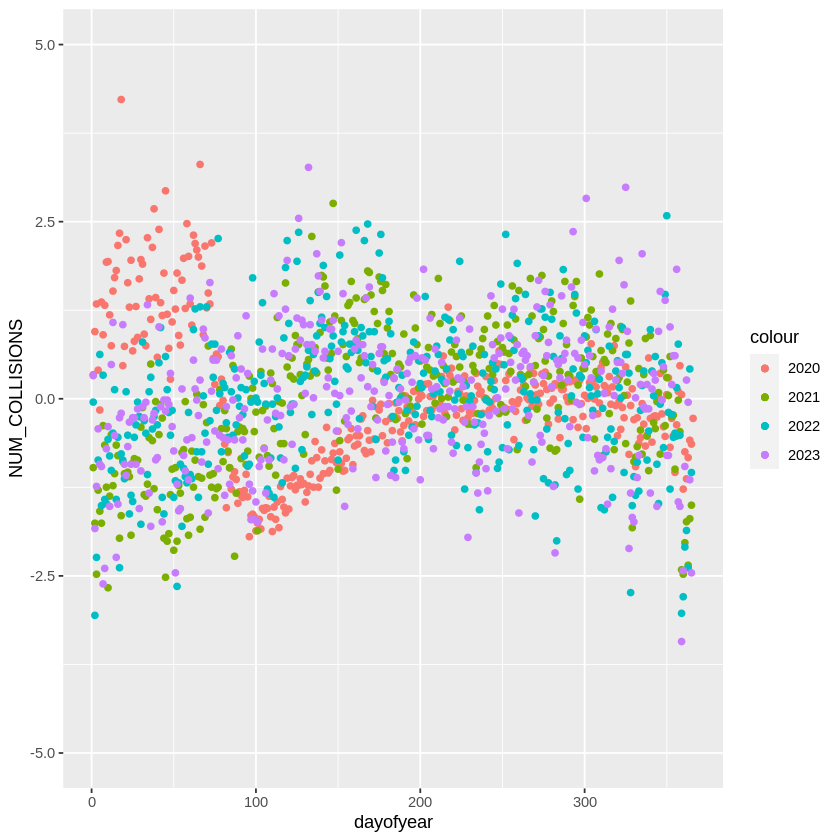

In [157]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayofyear, NUM_COLLISIONS, color="2020")) +
  geom_point(data=colsc21b, aes(dayofyear, NUM_COLLISIONS, color="2021")) +
  geom_point(data=colsc22b, aes(dayofyear, NUM_COLLISIONS, color="2022")) +
  geom_point(data=colsc23b, aes(dayofyear, NUM_COLLISIONS, color="2023"))

sp+ylim(-5, 5)

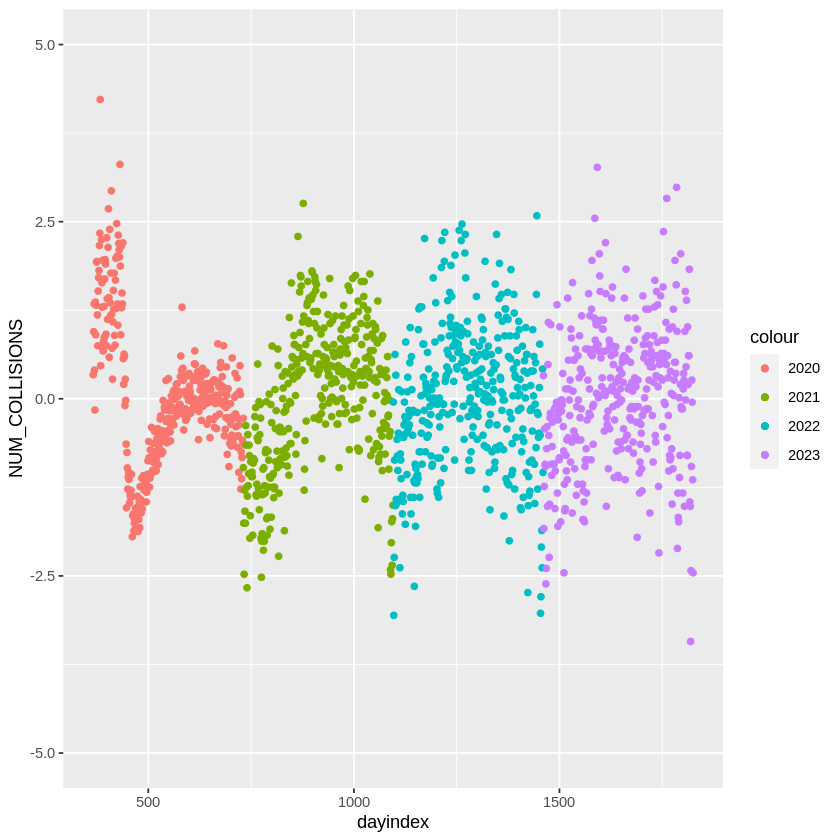

In [158]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayindex, NUM_COLLISIONS, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, NUM_COLLISIONS, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, NUM_COLLISIONS, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, NUM_COLLISIONS, color="2023"))

sp+ylim(-5, 5)

Since 2020, the amount of deviation by the mean number of collisions for that year has been increasing, indicating that the number of collisions per day are becoming increasingly varied.

NOTE: The affect climate change has on the weather can create inconsistent weather patterns  and could be contributing to the higher variance per year.

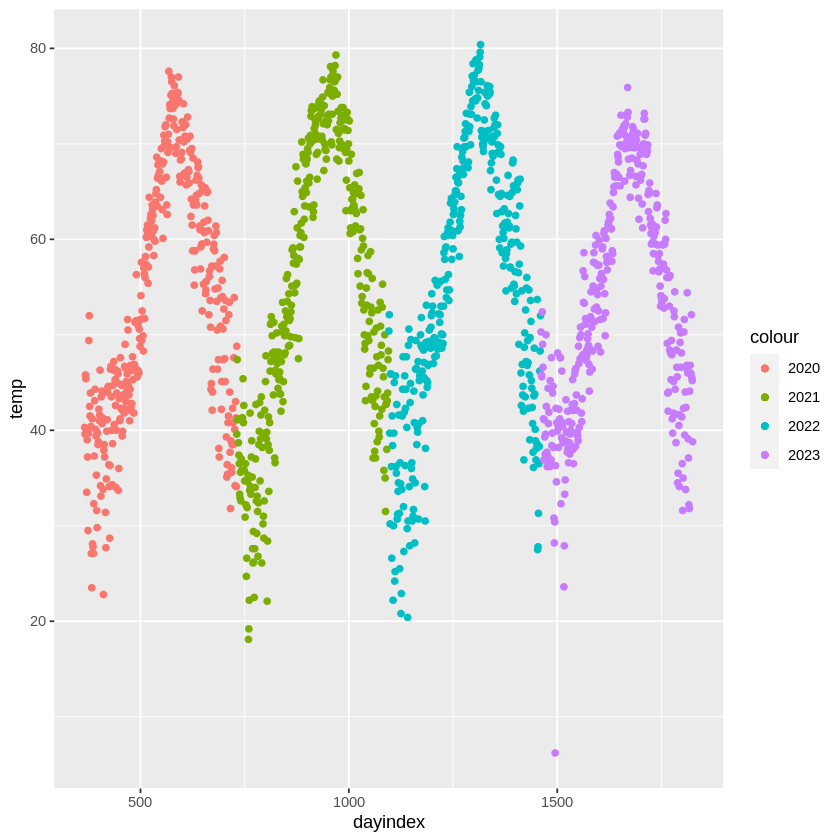

In [ ]:
ggplot() +
  geom_point(data=colsc20b, aes(dayindex, temp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, temp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, temp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, temp, color="2023"))

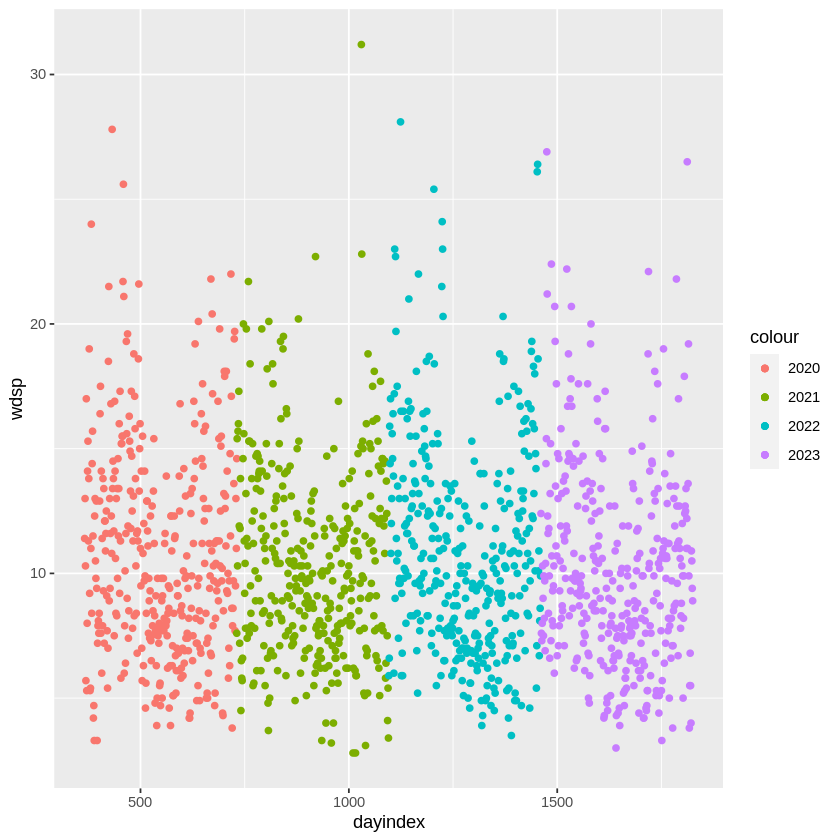

In [ ]:
ggplot() +
  geom_point(data=colsc20b, aes(dayindex, wdsp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, wdsp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, wdsp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, wdsp, color="2023"))

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


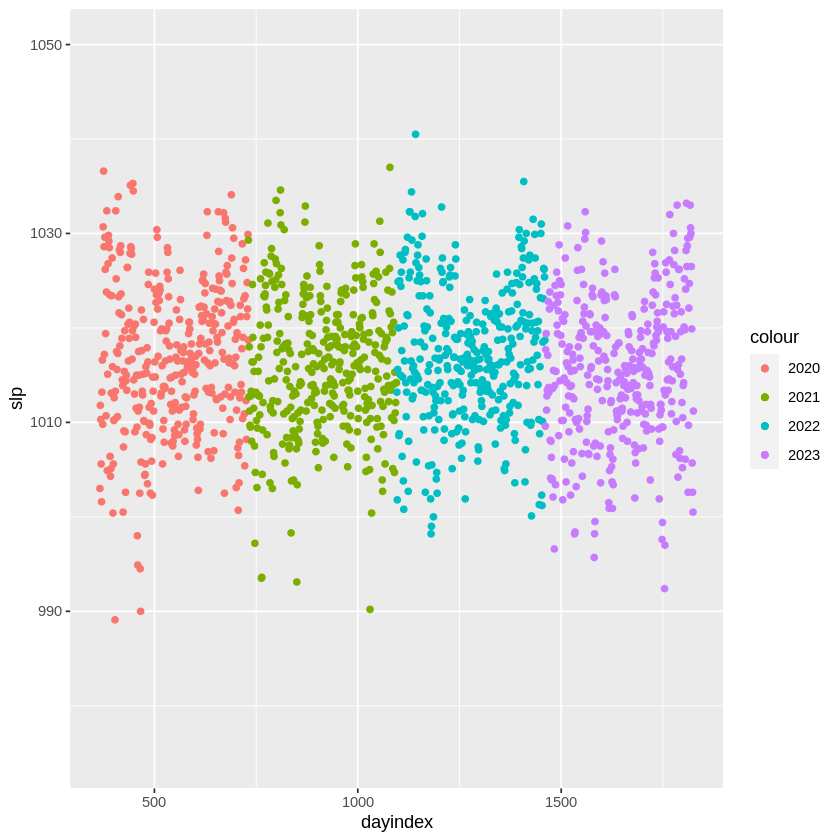

In [ ]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayindex, slp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, slp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, slp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, slp, color="2023"))

sp+ylim(975, 1050)

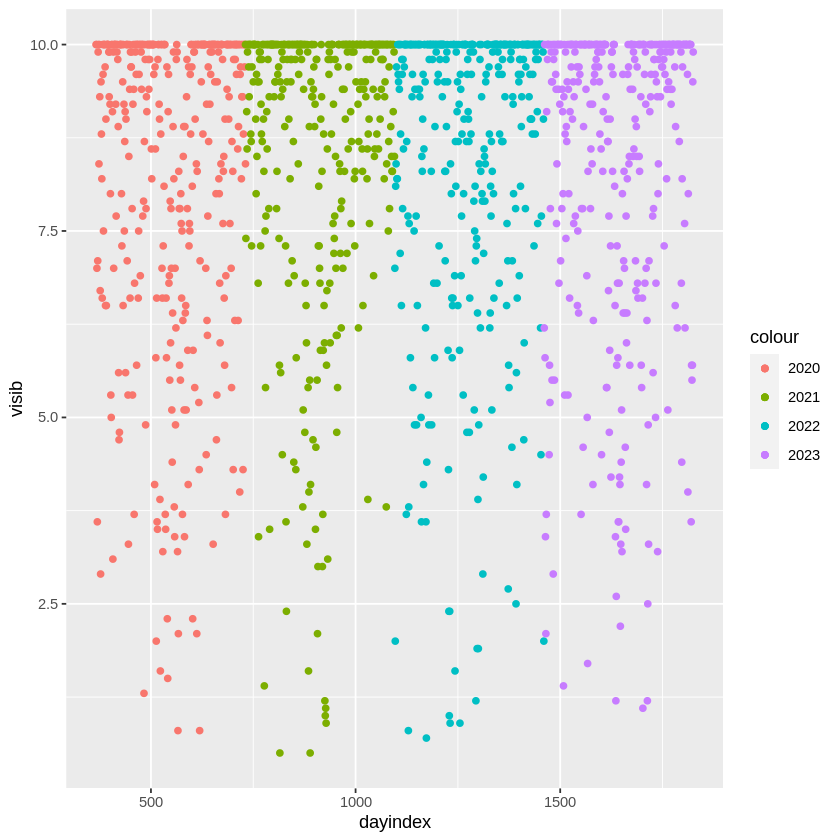

In [ ]:
ggplot() +
  geom_point(data=colsc20b, aes(dayindex, visib, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, visib, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, visib, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, visib, color="2023"))

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


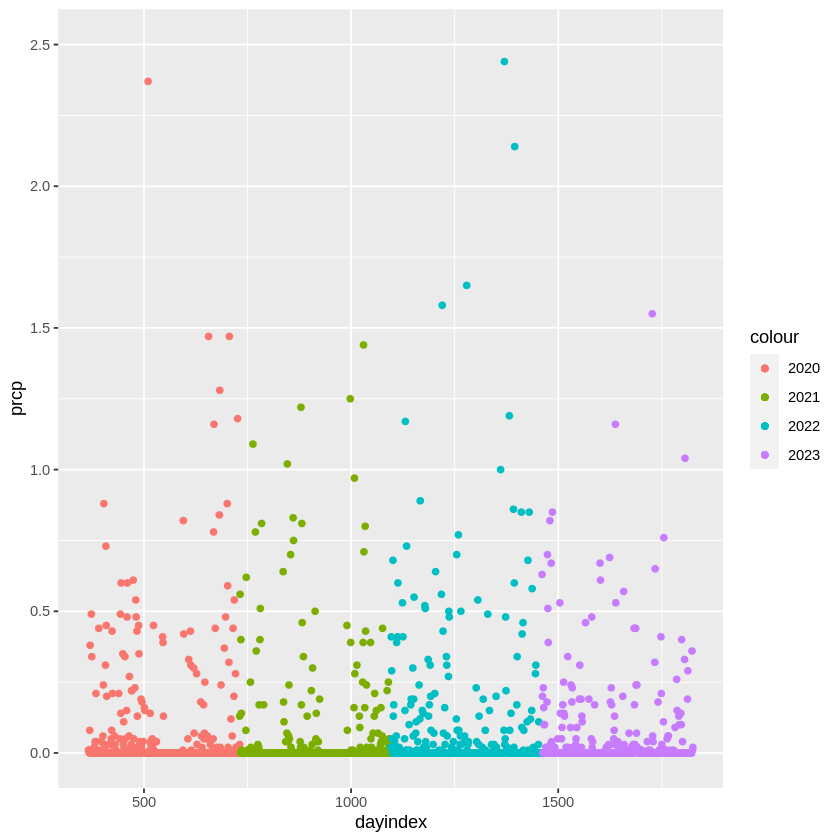

In [ ]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayindex, prcp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, prcp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, prcp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, prcp, color="2023"))

sp+ylim(0, 2.5)

Looking at the graphs above, there is no major differences between the years and the weather apart from the temperature becoming more varied throughout the years before becoming less varied in 2023.

However, temperature clearly does not play a role in variance as 2022 was more varied than 2023 and yet has less varied number of collisions than 2023.

The variance is more likely due to the number of collisions reducing since 2020, as seen in the "Number of collisions by day of the year" graph near the top of the colab.

For a final check, the new standardized dataset will be correlated and compared with the original dataset to see if there was a change in results.

In [160]:
cat(2020)
cor(colsc20b$fog, colsc20b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21b$fog, colsc21b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22b$fog, colsc22b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23b$fog, colsc23b$NUM_COLLISIONS, use="complete.obs")

2020

[1] 0.1025852


2021

[1] 0.1481348


2022

[1] 0.1514143


2023

[1] -0.01633972

In [161]:
cat(2020)
cor(colsc20b$min, colsc20b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21b$min, colsc21b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22b$min, colsc22b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23b$min, colsc23b$NUM_COLLISIONS, use="complete.obs")

2020

[1] -0.1970797


2021

[1] 0.5829222


2022

[1] 0.3277497


2023

[1] 0.1775037

In [162]:
cat(2020)
cor(colsc20b$visib, colsc20b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21b$visib, colsc21b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22b$visib, colsc22b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23b$visib, colsc23b$NUM_COLLISIONS, use="complete.obs")

2020

[1] -0.01838352


2021

[1] -0.1147363


2022

[1] -0.06835756


2023

[1] 0.0610896

In [163]:
cat(2020)
cor(colsc20b$wdsp, colsc20b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2021)
cor(colsc21b$wdsp, colsc21b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2022)
cor(colsc22b$wdsp, colsc22b$NUM_COLLISIONS, use="complete.obs")
cat("\n")

cat(2023)
cor(colsc23b$wdsp, colsc23b$NUM_COLLISIONS, use="complete.obs")

2020

[1] -0.04979149


2021

[1] -0.1080693


2022

[1] -0.1280291


2023

[1] 0.0004541712

Comparing the correlations to the correlations done prior to the standardization of the data, there is no difference between the correlations. This is as expected as standardization should not change the correlation. It should only convert the data to common format.

# Combining the years 2020 - 2023

Now that each individual recent year has been analysed and their correlations checked, it is now time to combine the years from 2020 to the year prior to the current.

This is important for two reasons:
1. With the data combined, a conclusive check can be done to see how the weather categories have changed in correlation to the number of collisions. This can be done by checking the whole dataset correlations and checking how the correlations to the number of collisions have changed since covid.

2. Regression and Neural Deep Network models can be used with the data combined to run models on recent years and provide a deeper analysis on the data. These two models can then check if there is a correlation between certain weather types and the number of collisions.

In [159]:
colsplitcheckcombined <- rbind(colsc20b, colsc21b, colsc22b, colsc23b)

In [17]:
cor(colsplitcheckcombined$temp, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] 0.254526

In [164]:
cor(colsplitcheckcombined$dewp, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] 0.2229031

In [165]:
cor(colsplitcheckcombined$slp, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] 0.01709347

In [166]:
cor(colsplitcheckcombined$visib, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] -0.03424101

In [167]:
cor(colsplitcheckcombined$wdsp, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] -0.07157158

In [168]:
cor(colsplitcheckcombined$mxpsd, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] -0.120778

In [169]:
cor(colsplitcheckcombined$gust, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] -0.05906615

In [170]:
cor(colsplitcheckcombined$max, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] 0.2620684

In [171]:
cor(colsplitcheckcombined$min, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] 0.2311535

In [172]:
cor(colsplitcheckcombined$prcp, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] -0.01905277

In [175]:
cor(colsplitcheckcombined$sndp, colsplitcheckcombined$NUM_COLLISIONS)

[1] NA

In [176]:
cor(colsplitcheckcombined$fog, colsplitcheckcombined$NUM_COLLISIONS, use="complete.obs")

[1] 0.09558733

Combining the years together and looking at the different aspects of the weather correlated with the number of collisions, it shows that those affected by temperature (temp, max, min and dewp) have a stronger correlation to the number of collisions than any other metric.

Referring to when the whole dataset was checked, temperature had a correlation of 0.0531662611847685 to the number of collisions. However, now it has a correlation of 0.254526038209847, a huge rise by about 0.2. This indicates that temperature has been having a bigger impact to the number of collisions in 2020 to 2023 rather than prior to 2020.

Max wind speed also has had a huge rise from -0.0244005134517447 to -0.120777959976837. This indicates that max wind speed plays a factor in making drivers want to be safer/not drive when the wind speeds are high. This is because the correlation is negative, which indicates the higher the wind speed, the lower the number of correlations and thus the safer drivers are being/opting not to drive.

When the collisions dataset was correlated before filtering, there was a big difference before and after filtering for the mean dew point in the example in the "Omitting the Missing Data" section. This becomes more apparent when the dataset is smaller.

An example of this is: if the dataset contained 10 rows and had a field that had 2 missing data, the missing data would have more of a sway on that data set's correlation rather than a dataset with 100 rows and 2 missing data. So, filtering beforehand was very important.

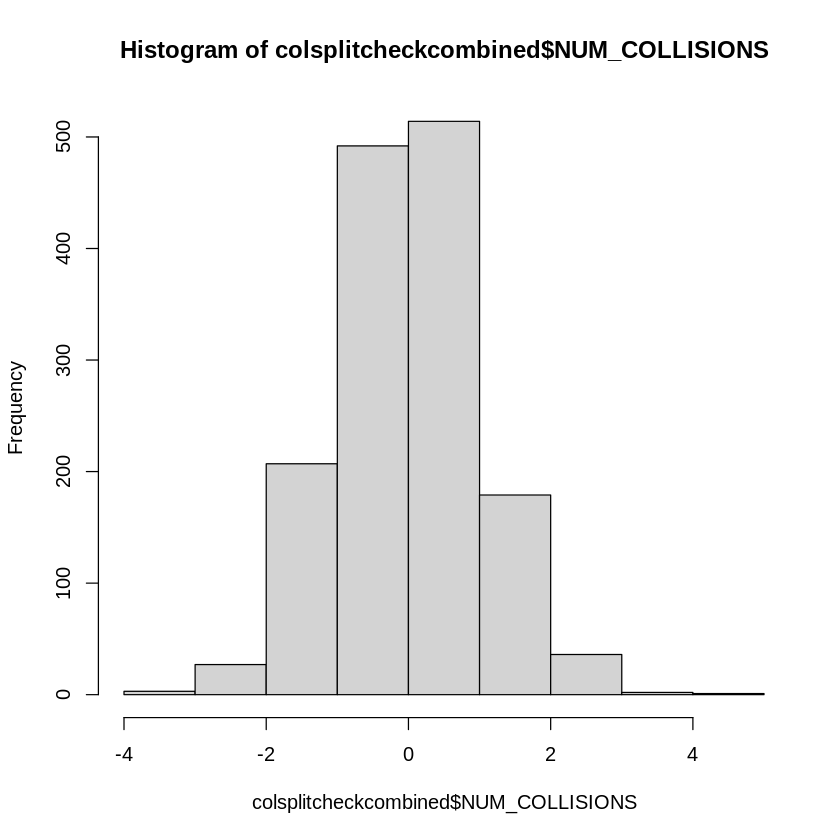

In [ ]:
hist(colsplitcheckcombined$NUM_COLLISIONS, breaks = 8)

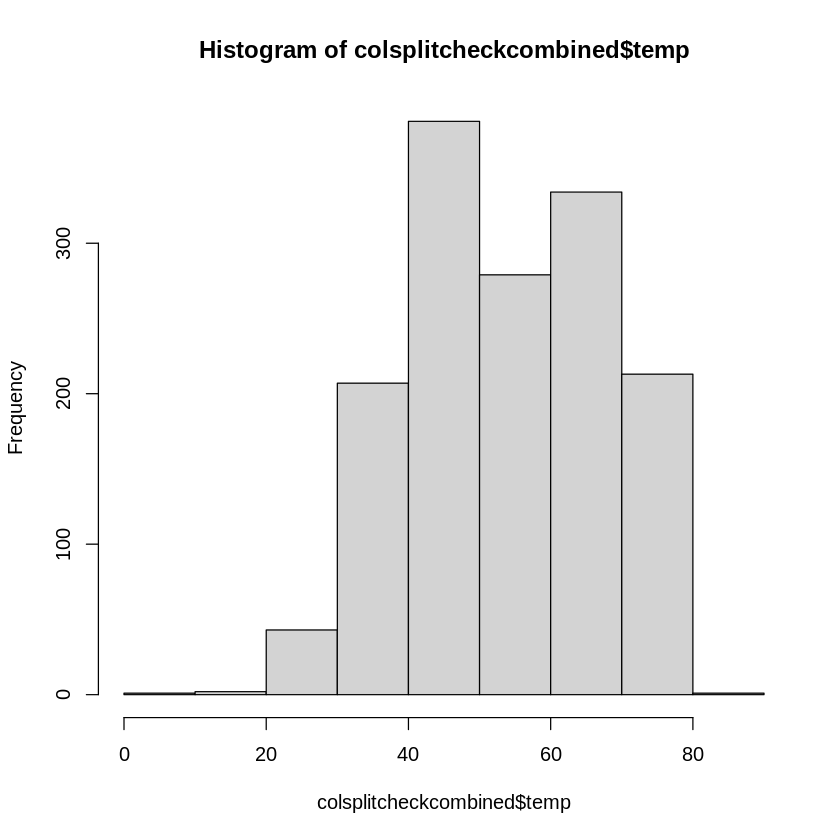

In [ ]:
hist(colsplitcheckcombined$temp, breaks = 8)

The histograms show the table now represents the number of collisions using standardization while the rest of the fields (using temperature as an example) is left untouched. This is exactly what was expected when doing standardization on the number of collisions field.

Whilst this means standardization is setup for use in linear regression models and deep neural networks models, there is still a little bit more work to be done on the dataset before it can be used in those models.

# Creating Datasets for Linear Regression and Deep Neural Network

The following will reformat the data to be used in the linear regression and the deep neural network. For both datasets, the three largest correlations that differed from one another were chosen. These were max temperature, max wind speed and fog.

The reason for choosing correlations that differed from one another was to see the affect different aspects of the weather had on the model results. Analysing, for example, the mean dew point, temperature and max would likely show similar results as they are all represented in Fahrenheit. So, it was important to choose different types of weather that were represented in different units. Hence why max temperature, max wind speed and fog were chosen.

In [180]:
head(colsplitcheckcombined)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
3092 366      1         3   2020 1  1  2020-01-01     40.3 29.9 1003.0 10.0 
2810 367      2         4   2020 1  2  2020-01-02     39.6 28.9 1011.8 10.0 
1776 368      3         5   2020 1  3  2020-01-03     45.8 42.9 1010.3  7.0 
341  369      4         6   2020 1  4  2020-01-04     45.4 43.9 1005.6  3.6 
4034 370      5         7   2020 1  5  2020-01-05     40.1 33.8 1001.6  7.1 
1696 371      6         1   2020 1  6  2020-01-06     33.5 24.0 1013.2  9.9 
     wdsp mxpsd gust max  min  prcp sndp fog NUM_COLLISIONS
3092 11.4 20.0  26.0 52.0 36.0 0.01 NA   0    0.3401737    
2810 13.0 19.0  26.0 46.0 33.1 0.01 NA   0    0.9481723    
1776 10.3 15.0    NA 46.9 33.1 0.00 NA   0    1.3383804    
341   5.7  9.9    NA 48.9 44.1 0.08 NA   1    0.4036960    
4034 17.0 27.0  38.1 48.9 36.0 0.38 NA   1   -0.1589296    
1696  5.3 15.0    NA 43.0 24.1 0.01 NA   0    1.3656042

The data looks ready for use in the linear regression and deep neural network models. The rows containing missing data in their appropriate fields are still set as NA, as it expected.

# Linear Regression CSV

First, the linear regression CSV must be setup by selecting the fields day, max temperature, max wind speed, fog and number of collisions. Once that is filtered, it can be saved as a csv for use in linear regression models.

In [193]:
collinearregressiondata <- colsplitcheckcombined[, c(3, 13, 15, 19, 20)]

In [194]:
head(collinearregressiondata)

day mxpsd max  fog NUM_COLLISIONS
3092 3   20.0  52.0 0    0.3401737    
2810 4   19.0  46.0 0    0.9481723    
1776 5   15.0  46.9 0    1.3383804    
341  6    9.9  48.9 1    0.4036960    
4034 7   27.0  48.9 1   -0.1589296    
1696 1   15.0  43.0 0    1.3656042

In [195]:
write.csv(collinearregressiondata, file="/content/collinearregressiondata.csv")

# Neural Deep Network CSV

Setup of the CSV for neural deep network requires a bit more work. First, the month and day columns must be changed to the first three letters of their names respectively (so 1 becomes January for months and 1 becomes Sunday for days).

Then, once that is done, the selected data (year, max temperature, max wind speed, fog and the number of collisions) must be set along with the names of their fields before it can be written to a CSV and used in the deep neural network models.

In [196]:
colsplitcheckcombined2 <- colsplitcheckcombined

In [197]:
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 1] <- "Jan"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 2] <- "Feb"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 3] <- "Mar"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 4] <- "Apr"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 5] <- "May"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 6] <- "Jun"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 7] <- "Jul"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 8] <- "Aug"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 9] <- "Sep"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 10] <- "Oct"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 11] <- "Nov"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 12] <- "Dec"

In [198]:
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 1] <- "Sun"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 2] <- "Mon"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 3] <- "Tue"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 4] <- "Wed"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 5] <- "Thu"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 6] <- "Fri"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 7] <- "Sat"

In [199]:
head(colsplitcheckcombined2)

dayindex dayofyear day year mo  da collision_date temp dewp slp    visib
3092 366      1         Tue 2020 Jan 1  2020-01-01     40.3 29.9 1003.0 10.0 
2810 367      2         Wed 2020 Jan 2  2020-01-02     39.6 28.9 1011.8 10.0 
1776 368      3         Thu 2020 Jan 3  2020-01-03     45.8 42.9 1010.3  7.0 
341  369      4         Fri 2020 Jan 4  2020-01-04     45.4 43.9 1005.6  3.6 
4034 370      5         Sat 2020 Jan 5  2020-01-05     40.1 33.8 1001.6  7.1 
1696 371      6         Sun 2020 Jan 6  2020-01-06     33.5 24.0 1013.2  9.9 
     wdsp mxpsd gust max  min  prcp sndp fog NUM_COLLISIONS
3092 11.4 20.0  26.0 52.0 36.0 0.01 NA   0    0.3401737    
2810 13.0 19.0  26.0 46.0 33.1 0.01 NA   0    0.9481723    
1776 10.3 15.0    NA 46.9 33.1 0.00 NA   0    1.3383804    
341   5.7  9.9    NA 48.9 44.1 0.08 NA   1    0.4036960    
4034 17.0 27.0  38.1 48.9 36.0 0.38 NA   1   -0.1589296    
1696  5.3 15.0    NA 43.0 24.1 0.01 NA   0    1.3656042

In [200]:
months <- model.matrix(~0+colsplitcheckcombined2$mo)
head(months)

colsplitcheckcombined2$moApr colsplitcheckcombined2$moAug
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  colsplitcheckcombined2$moDec colsplitcheckcombined2$moFeb
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  colsplitcheckcombined2$moJan colsplitcheckcombined2$moJul
1 1                            0                           
2 1                            0                           
3 1                            0                           
4 1                            0                           
5 1                            0                           
6 1                            0                           
  colsplitcheckcombined2$moJun colsplitcheckcombined2$moMar
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  colsplitcheckcombined2$moMay colsplitcheckcombined2$moNov
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0                           
  colsplitcheckcombined2$moOct colsplitcheckcombined2$moSep
1 0                            0                           
2 0                            0                           
3 0                            0                           
4 0                            0                           
5 0                            0                           
6 0                            0

In [201]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [202]:
head(months)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct Sep
1 0   0   0   0   1   0   0   0   0   0   0   0  
2 0   0   0   0   1   0   0   0   0   0   0   0  
3 0   0   0   0   1   0   0   0   0   0   0   0  
4 0   0   0   0   1   0   0   0   0   0   0   0  
5 0   0   0   0   1   0   0   0   0   0   0   0  
6 0   0   0   0   1   0   0   0   0   0   0   0

In [203]:
daysofweek <- model.matrix(~0+colsplitcheckcombined2$day)
head(daysofweek)

colsplitcheckcombined2$dayFri colsplitcheckcombined2$dayMon
1 0                             0                            
2 0                             0                            
3 0                             0                            
4 1                             0                            
5 0                             0                            
6 0                             0                            
  colsplitcheckcombined2$daySat colsplitcheckcombined2$daySun
1 0                             0                            
2 0                             0                            
3 0                             0                            
4 0                             0                            
5 1                             0                            
6 0                             1                            
  colsplitcheckcombined2$dayThu colsplitcheckcombined2$dayTue
1 0                             1                            
2 0                             0                            
3 1                             0                            
4 0                             0                            
5 0                             0                            
6 0                             0                            
  colsplitcheckcombined2$dayWed
1 0                            
2 1                            
3 0                            
4 0                            
5 0                            
6 0

In [204]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [205]:
head(daysofweek)

Fri Mon Sat Sun Thu Tue Wed
1 0   0   0   0   0   1   0  
2 0   0   0   0   0   0   1  
3 0   0   0   0   1   0   0  
4 1   0   0   0   0   0   0  
5 0   0   1   0   0   0   0  
6 0   0   0   1   0   0   0

In [206]:
coldeepneuralnetworkdata <- data.frame(months, daysofweek, colsplitcheckcombined2$year, colsplitcheckcombined2$mxpsd, colsplitcheckcombined2$max, colsplitcheckcombined2$fog, colsplitcheckcombined2$NUM_COLLISIONS)

In [207]:
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.year")] <- "year"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.mxpsd")] <- "mxpsd"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.max")] <- "max"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.fog")] <- "fog"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [208]:
summary(coldeepneuralnetworkdata)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08214   Mean   :0.08487   Mean   :0.08487   Mean   :0.07734  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
                                                                        
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08487   Mean   :0.08487   Mean   :0.08214   Mean   :0.08487  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.0000

In [209]:
head(coldeepneuralnetworkdata)

Apr Aug Dec Feb Jan Jul Jun Mar May Nov ⋯ Sat Sun Thu Tue Wed year mxpsd max 
1 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   1   0   2020 20.0  52.0
2 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   0   1   2020 19.0  46.0
3 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   1   0   0   2020 15.0  46.9
4 0   0   0   0   1   0   0   0   0   0   ⋯ 0   0   0   0   0   2020  9.9  48.9
5 0   0   0   0   1   0   0   0   0   0   ⋯ 1   0   0   0   0   2020 27.0  48.9
6 0   0   0   0   1   0   0   0   0   0   ⋯ 0   1   0   0   0   2020 15.0  43.0
  fog NUM_COLLISIONS
1 0    0.3401737    
2 0    0.9481723    
3 0    1.3383804    
4 1    0.4036960    
5 1   -0.1589296    
6 0    1.3656042

In [210]:
write.csv(coldeepneuralnetworkdata, file="/content/coldeepneuralnetworkdata.csv")

# Conclusion
Overall, from the data analysed so far, the data showed big changes once filtered, yet could not produce big enough correlations between weather and the number of collisions with the whole dataset correlated.

A dip of the number of collisions was noticed in 2020 and continued to stay low up until the current year, and so was checked to see the results and how they differed. However, the current year (2024) was omitted due to the current year not having ended.

The results in 2020 to 2023 showed a rise in correlation for temperature related fields. This had a big enough correlation to indicate that weather related to temperature/temperature that used Fahrenheit as a unit, such as mean dew point and temperature, had some sort of correlation to the number of collisions.

However, the trend was going down in fields affects by Fahrenheit, so it could be that the correlation is becoming obsolete as drivers get more used to the effects of climate change. Only further analysis in the coming years will be able to tell.

# Bibliography

Davies, J., 2015. Analysis of weather effects on daily road accidents. [Online]
Available at: https://analysisfunction.civilservice.gov.uk/wp-content/uploads/2017/01/Road-accidents.pdf
[Accessed 28 03 2024].

Staines, T., 2018. Car Crashes and the Weather: An Exploratory Analysis of Environmental Conditions' Impact on Traffic Accident Rates. [Online]
Available at: https://towardsdatascience.com/car-crashes-and-the-weather-an-exploratory-analysis-of-environmental-conditions-impact-on-traffic-12bcb7f9afed
[Accessed 28 03 2024].